# **Zillow Real Estate Summary**

## **Project Overview**

###### Objective

The objective of this project is to analyze the US housing market trends using data from Zillow Research and provide comprehensive insights and visualizations to assist a real estate investor in making informed decisions on where to invest \\$7.5 million for maximum gains. The analysis will focus on identifying potential markets for single-family homes or rental apartments, considering factors such as sale and inventory listing prices, market trends, square footage price ratios, time on market before renting or selling, average rental profits after mortgage payments, and any other relevant data. The project will deliver visually compelling presentations and reports to present the findings and recommendations to the investor.

In [1]:
import scipy as scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## 1. What part of the country I should invest in to receive maximum gains?

In [2]:
# Home values for 2BHK 
data2bhk = pd.read_csv("Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", encoding='latin1')
df2bhk = pd.DataFrame(data2bhk)
print('2BHK shape ', df2bhk.shape)

# Home values for 3BHK 
data3bhk = pd.read_csv("Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", encoding='latin1')
df3bhk = pd.DataFrame(data3bhk)
print('3BHK shape ', df3bhk.shape)

2BHK shape  (852, 285)
3BHK shape  (885, 285)


In [3]:
# unpivot table, convert date, regions do not have prices ignoring

val1= df2bhk.columns[:5].values
val2 = df2bhk.columns[5:].values

# 2bhk
df_unpivot_2bhk = pd.melt(df2bhk, id_vars=val1, value_vars=val2,  var_name='Date', value_name='Price')
df_unpivot_2bhk["Date"] = pd.to_datetime(df_unpivot_2bhk["Date"],format="%Y-%m-%d")
df_unpivot_2bhk = df_unpivot_2bhk[df_unpivot_2bhk.Price > 0]
print('2BHK Columns names')
print(df_unpivot_2bhk.columns)
print()
# df_unpivot_2bhk['RegionName'].unique()

# 3bhk
df_unpivot_3bhk = pd.melt(df3bhk, id_vars=val1, value_vars=val2,  var_name='Date', value_name='Price')
df_unpivot_3bhk["Date"] = pd.to_datetime(df_unpivot_3bhk["Date"],format="%Y-%m-%d")
df_unpivot_3bhk = df_unpivot_3bhk[df_unpivot_3bhk.Price > 0]
print('3BHK Columns names')
print(df_unpivot_3bhk.columns)
print()

print('2BHK Data')
display(df_unpivot_2bhk.head(5))
print()
print('3BHK Data')
display(df_unpivot_3bhk.head(5))
# df_unpivot_3bhk['RegionName'].unique()

2BHK Columns names
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'Price'],
      dtype='object')

3BHK Columns names
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'Price'],
      dtype='object')

2BHK Data


RegionID  SizeRank       RegionName RegionType StateName       Date  \
0    102001         0    United States    country       NaN 2000-01-31   
1    394913         1     New York, NY        msa        NY 2000-01-31   
2    753899         2  Los Angeles, CA        msa        CA 2000-01-31   
3    394463         3      Chicago, IL        msa        IL 2000-01-31   
4    394514         4       Dallas, TX        msa        TX 2000-01-31   

           Price  
0   79616.370509  
1  130294.084875  
2  167104.507063  
3   94678.712526  
4   64924.471700


3BHK Data


RegionID  SizeRank       RegionName RegionType StateName       Date  \
0    102001         0    United States    country       NaN 2000-01-31   
1    394913         1     New York, NY        msa        NY 2000-01-31   
2    753899         2  Los Angeles, CA        msa        CA 2000-01-31   
3    394463         3      Chicago, IL        msa        IL 2000-01-31   
4    394514         4       Dallas, TX        msa        TX 2000-01-31   

           Price  
0  110574.492862  
1  176481.398729  
2  222754.660944  
3  126190.612451  
4  109615.653092

Here, analyzing region-based home values. There are a lot of regions, and each region contains monthly data 
from Jan 2000 to April 2023. So, it is very difficult to plot data by considering all regions.
Found two approaches for plotting data.

1)	Considering all regions: Calculate the yearly mean of each region and filter data containing the highest mean values (like the top 20 records having the highest price). But in this approach, one region may appear more than once, so the top 20 records do not mean exactly the top 20 regions. Also, if we consider the highest mean value, we always get recent years’ data. So, this approach will not produce a correct plot to analyze trends.

2)	Considering the top 15 regions based on size rank. Calculate the yearly mean of each year for the selected regions only. Using this approach we are able to plot the data of the regions from the beginning of the dataset(2000) till the end(2023) and able to see proper trends (ups and downs or line smoothness).

In [4]:
# top 15 regions based on rank

# 2bhk
top_rgns_2bhk = df_unpivot_2bhk[(df_unpivot_2bhk.SizeRank > 0) & (df_unpivot_2bhk.SizeRank <= 15)]
top_rgns_2bhk['RegionName'].unique()
print('2BHK - top 15 regions')
print(top_rgns_2bhk['RegionName'].unique())
print()

# 3bhk
top_rgns_3bhk = df_unpivot_3bhk[(df_unpivot_3bhk.SizeRank > 0) & (df_unpivot_3bhk.SizeRank <= 15)]
print('3BHK - top 15 regions')
print(top_rgns_3bhk['RegionName'].unique())


2BHK - top 15 regions
['New York, NY' 'Los Angeles, CA' 'Chicago, IL' 'Dallas, TX' 'Houston, TX'
 'Washington, DC' 'Philadelphia, PA' 'Miami, FL' 'Atlanta, GA'
 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA' 'Riverside, CA'
 'Detroit, MI' 'Seattle, WA']

3BHK - top 15 regions
['New York, NY' 'Los Angeles, CA' 'Chicago, IL' 'Dallas, TX' 'Houston, TX'
 'Washington, DC' 'Philadelphia, PA' 'Miami, FL' 'Atlanta, GA'
 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA' 'Riverside, CA'
 'Detroit, MI' 'Seattle, WA']


In [5]:
# group by region, calculate yearly mean

# 2bhk
rgns_year_2bhk = top_rgns_2bhk[['RegionName', 'SizeRank', 'Date', 'Price']].set_index('Date').groupby('RegionName').resample('Y').mean()
print('2BHK yearly price by region')
display(rgns_year_2bhk)

# 3bhk
rgns_year_3bhk = top_rgns_3bhk[['RegionName', 'SizeRank', 'Date', 'Price']].set_index('Date').groupby('RegionName').resample('Y').mean()
print('3BHK yearly price by region')
display(rgns_year_3bhk)


2BHK yearly price by region


SizeRank          Price
RegionName     Date                               
Atlanta, GA    2000-12-31       9.0   83026.189486
               2001-12-31       9.0   90706.615671
               2002-12-31       9.0   96272.415963
               2003-12-31       9.0   99121.713507
               2004-12-31       9.0  101265.684005
...                             ...            ...
Washington, DC 2019-12-31       6.0  315371.710924
               2020-12-31       6.0  335506.607869
               2021-12-31       6.0  362808.987033
               2022-12-31       6.0  382970.896426
               2023-12-31       6.0  384513.644049

[360 rows x 2 columns]

3BHK yearly price by region


SizeRank          Price
RegionName     Date                               
Atlanta, GA    2000-12-31       9.0  119431.014081
               2001-12-31       9.0  128625.719640
               2002-12-31       9.0  135152.211136
               2003-12-31       9.0  138918.306678
               2004-12-31       9.0  142072.428869
...                             ...            ...
Washington, DC 2019-12-31       6.0  381926.035065
               2020-12-31       6.0  404426.762926
               2021-12-31       6.0  449916.879162
               2022-12-31       6.0  485348.621592
               2023-12-31       6.0  484515.714485

[360 rows x 2 columns]

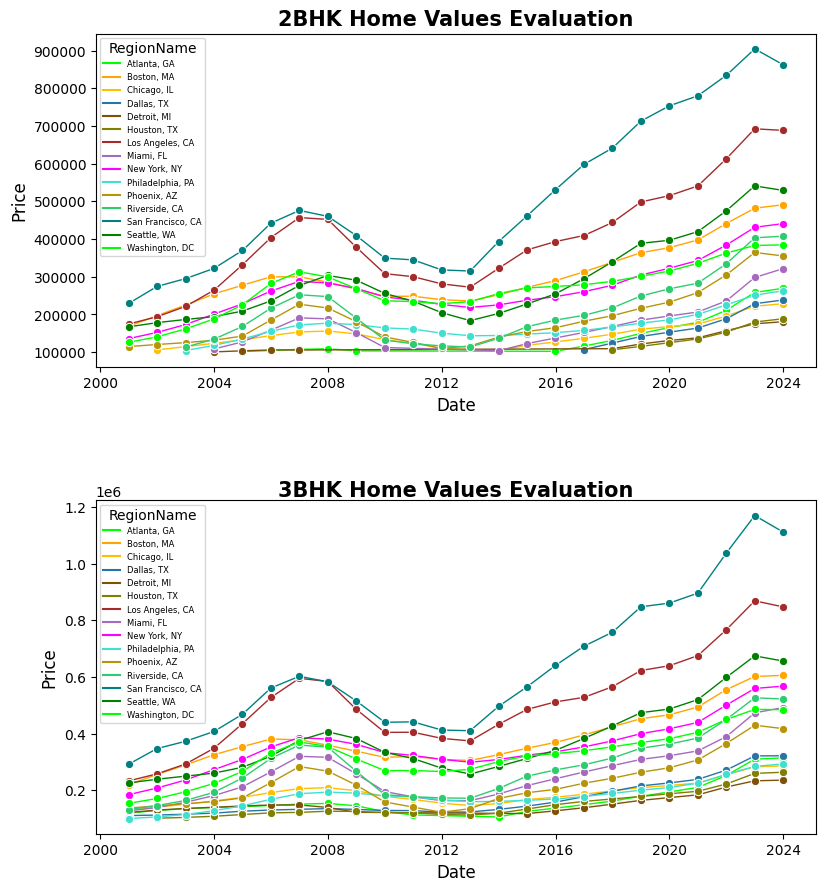

In [6]:
# filtering home values,price greater than 100000
rgns_year_2bhk = rgns_year_2bhk.loc[rgns_year_2bhk.Price > 100000]
rgns_year_3bhk = rgns_year_3bhk.loc[rgns_year_3bhk.Price > 100000]

palette = {"New York, NY":"fuchsia","Los Angeles, CA":"brown","Chicago, IL":"#FFBF00","Dallas, TX":"#2874A6",
           "Houston, TX":"olive","Washington, DC":"lime","Philadelphia, PA":"#40E0D0", "Miami, FL":"#A569BD", 
           "Atlanta, GA":"lime", "Boston, MA":"orange","Phoenix, AZ": "#B7950B","San Francisco, CA":"teal",
           "Riverside, CA": "#2ECC71","Detroit, MI": "#7E5109","Seattle, WA": "green", "Minneapolis, MN": "#D35400",
           "San Diego, CA": "blue", "Tampa, FL": "#935116", "Denver, CO": "aqua", "Baltimore, MD": "#AED6F1"}

fig = plt.subplots(figsize=(9,10))

plt.subplot(2, 1, 1)
ax1 = sns.lineplot(x = "Date",
            y = "Price",
            hue="RegionName",
            style="RegionName",
            marker='o',
            dashes=False,
            linewidth=1,
            palette=palette,
            data = rgns_year_2bhk)

sns.move_legend(ax1, "upper left", fontsize='6')

plt.title('2BHK Home Values Evaluation', fontsize=15, fontweight="bold")
ax1.set_xlabel('Date', fontsize = 12)
ax1.set_ylabel('Price', fontsize = 12)
#plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
ax1 = sns.lineplot(x = "Date",
            y = "Price",
            hue="RegionName",
            style="RegionName",
            marker='o',
            dashes=False,
            linewidth=1, 
            palette=palette,
            data = rgns_year_3bhk)

sns.move_legend(ax1, "upper left", fontsize='6')

plt.title('3BHK Home Values Evaluation', fontsize=15, fontweight="bold", pad=2)
ax1.set_xlabel('Date', fontsize = 12)
ax1.set_ylabel('Price', fontsize = 12)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

The above data visualization shows trends of region-based housing data of home types 2BHK and 3BHK from Jan 2000 to April 2023. We observed San Francisco, CA, and Los Angeles, CA peaks are extremely high compared to other regions. Housing in California is expensive due to high demand and low supply. So we cannot consider those regions. Also, we can omit the regions having lower ranges where home values are not increased much over the year.

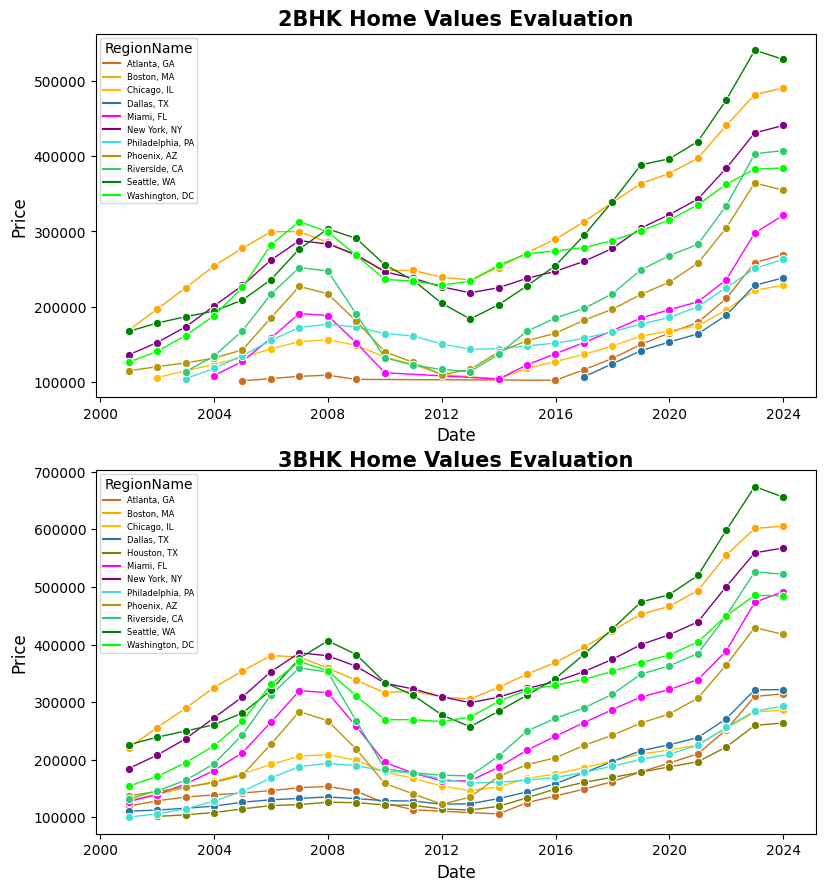

In [7]:
rgns_year_2bhk1 = rgns_year_2bhk[(rgns_year_2bhk.SizeRank != 2) & (rgns_year_2bhk.SizeRank != 5)
                                 & (rgns_year_2bhk.SizeRank != 12) & (rgns_year_2bhk.SizeRank != 14)]

rgns_year_3bhk1 = rgns_year_3bhk[(rgns_year_3bhk.SizeRank != 2) & (rgns_year_3bhk.SizeRank != 12) & (rgns_year_3bhk.SizeRank != 14)]


palette = {"New York, NY":"purple","Los Angeles, CA":"brown","Chicago, IL":"#FFBF00","Dallas, TX":"#2874A6",
           "Houston, TX":"olive","Washington, DC":"lime","Philadelphia, PA":"#40E0D0", "Miami, FL":"fuchsia", 
           "Atlanta, GA":"#CA6F1E", "Boston, MA":"orange","Phoenix, AZ": "#B7950B","San Francisco, CA":"teal",
           "Riverside, CA": "#2ECC71","Detroit, MI": "#7E5109","Seattle, WA": "green", "Minneapolis, MN": "#D35400",
           "San Diego, CA": "blue", "Tampa, FL": "#935116", "Denver, CO": "aqua", "Baltimore, MD": "#AED6F1"}

fig = plt.subplots(figsize=(9,10))

plt.subplot(2, 1, 1)
ax1 = sns.lineplot(x = "Date",
            y = "Price",
            hue="RegionName",
            style="RegionName",
            marker='o',
            dashes=False,
            linewidth=1,
            palette=palette,
            data = rgns_year_2bhk1)

sns.move_legend(ax1, "upper left", fontsize='6')

plt.title('2BHK Home Values Evaluation', fontsize=15, fontweight="bold")
ax1.set_xlabel('Date', fontsize = 12)
ax1.set_ylabel('Price', fontsize = 12)
#plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
ax1 = sns.lineplot(x = "Date",
            y = "Price",
            hue="RegionName",
            style="RegionName",
            marker='o',
            dashes=False,
            linewidth=1, 
            palette=palette,
            data = rgns_year_3bhk1)

sns.move_legend(ax1, "upper left", fontsize='6')

plt.title('3BHK Home Values Evaluation', fontsize=15, fontweight="bold", pad=2)
ax1.set_xlabel('Date', fontsize = 12)
ax1.set_ylabel('Price', fontsize = 12)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

The above graphical representation shows that in 2008 prices increased, and around 2012 prices dropped, around 2020 prices 
were stable maybe because of Covid, and for a few regions slightly lower from 2022 to 2023 maybe because of the recession.

However, observe more ups and downs for Seattle, WA, and Boston, MA. Also, Seattle, WA home values are reduced from 2022 to 
2023. This means prices may fluctuate in those areas.

On the other hand, New York, NY, and Riverside, CA have steadily increased. Housing in California and New York is expensive
due to high demand and low supply. Also, the cost of leaving is high. So, it is not suggestable to invest in NY and CA.

On the other hand, Phoenix, AZ, and Miami, FL home values are reasonable, and prices steadily increase over the year. So,
for 2BHK and 3BHK flats investing in Miami and Phoenix are sensible because future selling flats will be profitable.

In [8]:
# A forecast of the Zillow Home Value using the all homes, mid-tier

futuredata = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv", encoding='latin1')
df_forcast = pd.DataFrame(futuredata)
print(df_forcast.shape)
df_forcast

(896, 9)


RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0      102001         0    United States    country       NaN  2023-04-30   
1      394913         1     New York, NY        msa        NY  2023-04-30   
2      753899         2  Los Angeles, CA        msa        CA  2023-04-30   
3      394463         3      Chicago, IL        msa        IL  2023-04-30   
4      394514         4       Dallas, TX        msa        TX  2023-04-30   
..        ...       ...              ...        ...       ...         ...   
891    753929       935       Zapata, TX        msa        TX  2023-04-30   
892    394743       936    Ketchikan, AK        msa        AK  2023-04-30   
893    753874       937        Craig, CO        msa        CO  2023-04-30   
894    395188       938       Vernon, TX        msa        TX  2023-04-30   
895    394767       939       Lamesa, TX        msa        TX  2023-04-30   

     2023-05-31  2023-07-31  2024-04-30  
0           0.9         2.2         4.7  
1           0.6         1.4         2.4  
2           0.6         0.9         2.5  
3           0.8         1.8         1.4  
4           0.9         1.6         3.9  
..          ...         ...         ...  
891         0.5         1.1        -0.6  
892         0.6         1.7         1.1  
893         1.4         3.7         6.9  
894         0.7         1.5         2.7  
895         0.8         1.7        -2.0  

[896 rows x 9 columns]

In [9]:
# Formation data

val1= df_forcast.columns[1:3].values
# print(val1)
val2 = df_forcast.columns[6:].values
# print(val2)

df_unpivot_forcast = pd.melt(df_forcast, id_vars=val1, value_vars=val2,  var_name='Date', value_name='Price')
df_unpivot_forcast["Date"] = pd.to_datetime(df_unpivot_forcast["Date"],format="%Y-%m-%d")
df_unpivot_forcast

top_rgns_forcast = df_unpivot_forcast[(df_unpivot_forcast.SizeRank > 0) & (df_unpivot_forcast.SizeRank <= 15)]

top_rgns_forcast.set_index('RegionName')
top_rgns_forcast.head(5)


SizeRank       RegionName       Date  Price
1         1     New York, NY 2023-05-31    0.6
2         2  Los Angeles, CA 2023-05-31    0.6
3         3      Chicago, IL 2023-05-31    0.8
4         4       Dallas, TX 2023-05-31    0.9
5         5      Houston, TX 2023-05-31    0.6

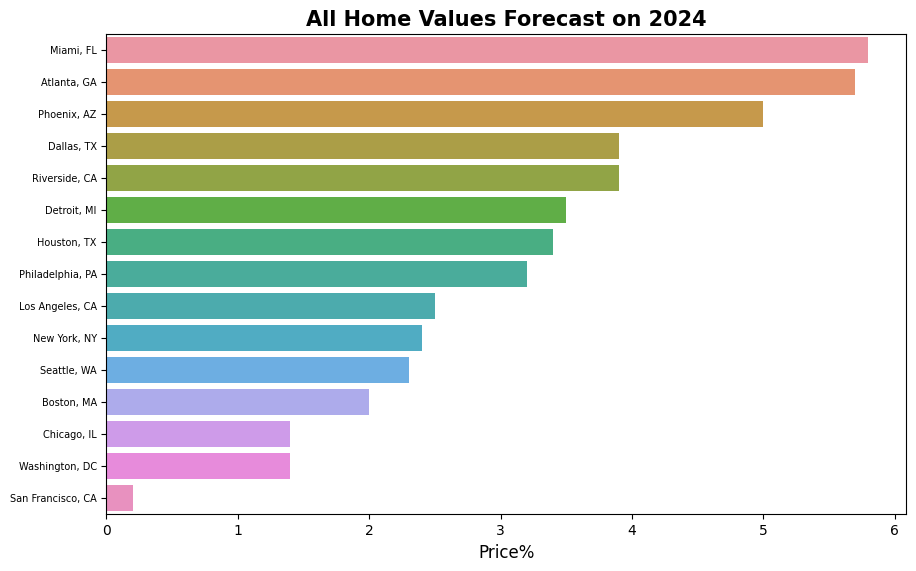

In [10]:
top_rgns_forcast1 = top_rgns_forcast.loc[top_rgns_forcast.Date == '2024-04-30'].sort_values(by='Price', ascending=False)

fig = plt.subplots(figsize=(10,6))
ax = sns.barplot(y = "RegionName",
            x = "Price",
            #palette=palette,
            data = top_rgns_forcast1)
#sns.despine(left=True, bottom=True)
plt.title('All Home Values Forecast on 2024', fontsize=15, fontweight="bold")
ax.set_xlabel('Price%', fontsize=12)
plt.yticks(fontsize= 7 )
ax.set_ylabel('')
#plt.xticks(rotation=90,fontsize= 7 )
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

The above data visualization shows Zillow’s Home Value Forecast of all types of homes is based on the upgraded ZHVI that harnesses the power of the neural Zestimate in 2024. The future predict data indicates that it could be good to invest in Miami, Atlanta, and Phoenix now to get more profitability in the future.

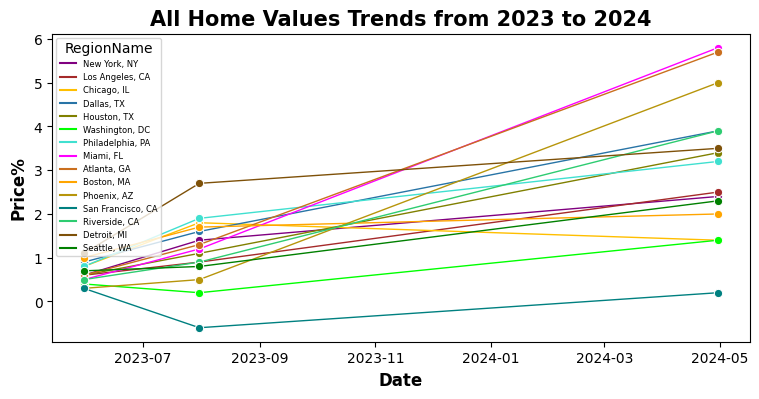

In [11]:
# Evaluate home values 

palette = {"New York, NY":"purple","Los Angeles, CA":"brown","Chicago, IL":"#FFBF00","Dallas, TX":"#2874A6",
           "Houston, TX":"olive","Washington, DC":"lime","Philadelphia, PA":"#40E0D0", "Miami, FL":"fuchsia", 
           "Atlanta, GA":"#CA6F1E", "Boston, MA":"orange","Phoenix, AZ": "#B7950B","San Francisco, CA":"teal",
           "Riverside, CA": "#2ECC71","Detroit, MI": "#7E5109","Seattle, WA": "green", "Minneapolis, MN": "#D35400",
           "San Diego, CA": "blue", "Tampa, FL": "#935116", "Denver, CO": "aqua", "Baltimore, MD": "#AED6F1"}


fig = plt.subplots(figsize=(9,4))

ax = sns.lineplot(x = "Date",
            y = "Price",
            hue="RegionName",
            style="RegionName",
            marker='o',
            dashes=False,
            linewidth=1,            
            palette=palette,
            data = top_rgns_forcast)

sns.move_legend(ax, "upper left", fontsize='6')

plt.title('All Home Values Trends from 2023 to 2024', fontsize=15, fontweight="bold")
ax.set_xlabel('Date', fontweight='bold', fontsize='12')
ax.set_ylabel('Price%', fontweight='bold', fontsize='12')
#plt.xticks(rotation=90)
plt.show()

The above graphical representation depicts the trends in all types of home values from 2023 to 2024. The current home values of Miami, FL, Atlanta, GA, and Phoenix, AZ are reasonable but in 2024 values drastically increased. So, for all types of homes, buyers can focus on Miami, Atlanta, and Phoenix.

### By analyzing home values(2BHK & 3BHK) from 2000 to 2023 and reviewing all types of home values forecast in 2024 conclude that investing in Miami, Atlanta, and Phoenix will be more profitable.

## 2. Is the sale and inventory listing price going up or down overall?

In [12]:
# Loading SFR sale-inventory data
base_sfr_data = pd.read_csv("List and Sale Price Median (Raw SFR Monthly).csv")
sfr_temp=base_sfr_data
display(sfr_temp)

RegionID  SizeRank       RegionName RegionType StateName  2008-02-29  \
0      102001         0    United States    country       NaN    175000.0   
1      394913         1     New York, NY        msa        NY    410000.0   
2      753899         2  Los Angeles, CA        msa        CA    549000.0   
3      394463         3      Chicago, IL        msa        IL    245000.0   
4      394514         4       Dallas, TX        msa        TX    137000.0   
..        ...       ...              ...        ...       ...         ...   
597    394869       869      Moberly, MO        msa        MO         NaN   
598    395004       872   Prineville, OR        msa        OR         NaN   
599    395239       885  Worthington, MN        msa        MN         NaN   
600    394371       891     Beatrice, NE        msa        NE         NaN   
601    786257       914     Fairmont, MN        msa        MN         NaN   

     2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2022-06-30  \
0      180000.0    181000.0    185000.0    190000.0  ...    370000.0   
1      400000.0    405000.0    409934.0    410000.0  ...    590000.0   
2      535000.0    541000.0    520000.0    517250.0  ...    930000.0   
3      242000.0    250000.0    250000.0    258000.0  ...    320000.0   
4      144500.0    144000.0    146000.0    155000.0  ...    427000.0   
..          ...         ...         ...         ...  ...         ...   
597         NaN         NaN         NaN         NaN  ...         NaN   
598         NaN         NaN         NaN         NaN  ...         NaN   
599         NaN         NaN         NaN         NaN  ...         NaN   
600         NaN         NaN         NaN         NaN  ...         NaN   
601         NaN         NaN         NaN         NaN  ...         NaN   

     2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0      359000.0    350000.0    345000.0    339900.0    330000.0    325000.0   
1      605000.0    600000.0    580000.0    564450.0    556100.0    550000.0   
2      899000.0    890000.0    875000.0    865000.0    860000.0    840000.0   
3      315000.0    305500.0    291000.0    285000.0    285000.0    280000.0   
4      415000.0    400000.0    392500.0    390000.0    375500.0    366000.0   
..          ...         ...         ...         ...         ...         ...   
597         NaN         NaN         NaN         NaN         NaN         NaN   
598         NaN         NaN         NaN         NaN         NaN         NaN   
599         NaN         NaN         NaN         NaN         NaN         NaN   
600         NaN         NaN         NaN         NaN         NaN         NaN   
601         NaN         NaN         NaN         NaN         NaN         NaN   

     2023-01-31  2023-02-28  2023-03-31  
0      320000.0    332000.0    345000.0  
1      545000.0    549000.0    541327.0  
2      835000.0    849900.0    862500.0  
3      275000.0    275000.0    300000.0  
4      357500.0    375000.0    377000.0  
..          ...         ...         ...  
597         NaN    107350.0    127200.0  
598         NaN         NaN    445000.0  
599         NaN         NaN    159000.0  
600         NaN         NaN    133900.0  
601         NaN    120000.0    133338.0  

[602 rows x 187 columns]

In [13]:
sfr_temp.describe()

RegionID    SizeRank     2008-02-29     2008-03-31     2008-04-30  \
count     602.000000  602.000000     370.000000     370.000000     370.000000   
mean   416243.358804  355.093023  176699.010811  178710.278378  178004.294595   
std     89724.573306  232.926912  106231.746623  108884.290716  103276.521995   
min    102001.000000    0.000000   45000.000000   54250.000000   44000.000000   
25%    394554.250000  153.250000  115300.000000  117000.000000  116000.000000   
50%    394813.500000  329.500000  141250.000000  143987.500000  145475.000000   
75%    395061.750000  540.500000  208000.000000  208750.000000  204875.000000   
max    845167.000000  914.000000  745000.000000  772500.000000  749000.000000   

          2008-05-31     2008-06-30     2008-07-31     2008-08-31  \
count     370.000000     371.000000     371.000000     371.000000   
mean   180747.845946  183029.045822  181490.380054  177638.929919   
std    100320.360924   98885.245761   98596.007450   96029.310889   
min     62500.000000   63500.000000   55500.000000   37485.000000   
25%    121187.500000  123700.000000  123065.500000  120000.000000   
50%    150000.000000  153500.000000  150500.000000  149900.000000   
75%    213500.000000  214552.500000  208225.000000  203850.000000   
max    763500.000000  720000.000000  690000.000000  701000.000000   

          2008-09-30  ...    2022-06-30    2022-07-31    2022-08-31  \
count     371.000000  ...  5.510000e+02  5.510000e+02  5.510000e+02   
mean   170772.571429  ...  3.088786e+05  3.048799e+05  2.982724e+05   
std     89701.081613  ...  1.826379e+05  1.772974e+05  1.688314e+05   
min     50750.000000  ...  9.400000e+04  1.020000e+05  9.000000e+04   
25%    116312.500000  ...  1.950000e+05  1.950000e+05  1.925000e+05   
50%    145150.000000  ...  2.550000e+05  2.535000e+05  2.500000e+05   
75%    193700.000000  ...  3.599500e+05  3.507500e+05  3.500000e+05   
max    630000.000000  ...  1.606500e+06  1.500000e+06  1.465000e+06   

         2022-09-30    2022-10-31    2022-11-30    2022-12-31    2023-01-31  \
count  5.510000e+02  5.510000e+02  5.520000e+02  5.530000e+02  5.550000e+02   
mean   2.953490e+05  2.933350e+05  2.874526e+05  2.792701e+05  2.760935e+05   
std    1.670212e+05  1.720374e+05  1.688264e+05  1.598595e+05  1.629880e+05   
min    7.300000e+04  5.400000e+04  6.800000e+04  6.400000e+04  5.800000e+04   
25%    1.900000e+05  1.870000e+05  1.800000e+05  1.780000e+05  1.746750e+05   
50%    2.480000e+05  2.460000e+05  2.400000e+05  2.350000e+05  2.320000e+05   
75%    3.482000e+05  3.437250e+05  3.428500e+05  3.250000e+05  3.275000e+05   
max    1.475000e+06  1.437500e+06  1.450000e+06  1.350000e+06  1.347500e+06   

         2023-02-28    2023-03-31  
count  5.700000e+02  6.020000e+02  
mean   2.761640e+05  2.826827e+05  
std    1.628712e+05  1.689019e+05  
min    6.304000e+04  3.950000e+04  
25%    1.750000e+05  1.799500e+05  
50%    2.350000e+05  2.400000e+05  
75%    3.250000e+05  3.307500e+05  
max    1.350000e+06  1.515000e+06  

[8 rows x 184 columns]

In [14]:
#dropping Column RegionID, SizeRank, RegionType,StateName. These c0lumns contains duplicate information or contains non-essential data
sfr_temp = sfr_temp.drop(sfr_temp.columns[[0,1,3,4]], axis=1)
display(sfr_temp)

RegionName  2008-02-29  2008-03-31  2008-04-30  2008-05-31  \
0      United States    175000.0    180000.0    181000.0    185000.0   
1       New York, NY    410000.0    400000.0    405000.0    409934.0   
2    Los Angeles, CA    549000.0    535000.0    541000.0    520000.0   
3        Chicago, IL    245000.0    242000.0    250000.0    250000.0   
4         Dallas, TX    137000.0    144500.0    144000.0    146000.0   
..               ...         ...         ...         ...         ...   
597      Moberly, MO         NaN         NaN         NaN         NaN   
598   Prineville, OR         NaN         NaN         NaN         NaN   
599  Worthington, MN         NaN         NaN         NaN         NaN   
600     Beatrice, NE         NaN         NaN         NaN         NaN   
601     Fairmont, MN         NaN         NaN         NaN         NaN   

     2008-06-30  2008-07-31  2008-08-31  2008-09-30  2008-10-31  ...  \
0      190000.0    190000.0    185650.0    178500.0    175000.0  ...   
1      410000.0    425000.0    430000.0    410000.0    390000.0  ...   
2      517250.0    500000.0    485000.0    462000.0    464750.0  ...   
3      258000.0    265000.0    260000.0    250000.0    235500.0  ...   
4      155000.0    156000.0    151000.0    143000.0    140000.0  ...   
..          ...         ...         ...         ...         ...  ...   
597         NaN         NaN         NaN         NaN         NaN  ...   
598         NaN         NaN         NaN         NaN         NaN  ...   
599         NaN         NaN         NaN         NaN         NaN  ...   
600         NaN         NaN         NaN         NaN         NaN  ...   
601         NaN         NaN         NaN         NaN         NaN  ...   

     2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  \
0      370000.0    359000.0    350000.0    345000.0    339900.0    330000.0   
1      590000.0    605000.0    600000.0    580000.0    564450.0    556100.0   
2      930000.0    899000.0    890000.0    875000.0    865000.0    860000.0   
3      320000.0    315000.0    305500.0    291000.0    285000.0    285000.0   
4      427000.0    415000.0    400000.0    392500.0    390000.0    375500.0   
..          ...         ...         ...         ...         ...         ...   
597         NaN         NaN         NaN         NaN         NaN         NaN   
598         NaN         NaN         NaN         NaN         NaN         NaN   
599         NaN         NaN         NaN         NaN         NaN         NaN   
600         NaN         NaN         NaN         NaN         NaN         NaN   
601         NaN         NaN         NaN         NaN         NaN         NaN   

     2022-12-31  2023-01-31  2023-02-28  2023-03-31  
0      325000.0    320000.0    332000.0    345000.0  
1      550000.0    545000.0    549000.0    541327.0  
2      840000.0    835000.0    849900.0    862500.0  
3      280000.0    275000.0    275000.0    300000.0  
4      366000.0    357500.0    375000.0    377000.0  
..          ...         ...         ...         ...  
597         NaN         NaN    107350.0    127200.0  
598         NaN         NaN         NaN    445000.0  
599         NaN         NaN         NaN    159000.0  
600         NaN         NaN         NaN    133900.0  
601         NaN         NaN    120000.0    133338.0  

[602 rows x 183 columns]

**Data Cleaning and Wrangling**

In [15]:
sfr_temp = sfr_temp.rename(columns = {"RegionName":"Date"})
display(sfr_temp.head())
all_columns_sfr = list(sfr_temp.columns)
array_sfr=sfr_temp.to_numpy()
sfr_data_transpose=pd.DataFrame(array_sfr.T, index = all_columns_sfr)
sfr_data_transpose.columns=sfr_data_transpose.iloc[0]
sfr_data_transpose

Date  2008-02-29  2008-03-31  2008-04-30  2008-05-31  \
0    United States    175000.0    180000.0    181000.0    185000.0   
1     New York, NY    410000.0    400000.0    405000.0    409934.0   
2  Los Angeles, CA    549000.0    535000.0    541000.0    520000.0   
3      Chicago, IL    245000.0    242000.0    250000.0    250000.0   
4       Dallas, TX    137000.0    144500.0    144000.0    146000.0   

   2008-06-30  2008-07-31  2008-08-31  2008-09-30  2008-10-31  ...  \
0    190000.0    190000.0    185650.0    178500.0    175000.0  ...   
1    410000.0    425000.0    430000.0    410000.0    390000.0  ...   
2    517250.0    500000.0    485000.0    462000.0    464750.0  ...   
3    258000.0    265000.0    260000.0    250000.0    235500.0  ...   
4    155000.0    156000.0    151000.0    143000.0    140000.0  ...   

   2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  \
0    370000.0    359000.0    350000.0    345000.0    339900.0    330000.0   
1    590000.0    605000.0    600000.0    580000.0    564450.0    556100.0   
2    930000.0    899000.0    890000.0    875000.0    865000.0    860000.0   
3    320000.0    315000.0    305500.0    291000.0    285000.0    285000.0   
4    427000.0    415000.0    400000.0    392500.0    390000.0    375500.0   

   2022-12-31  2023-01-31  2023-02-28  2023-03-31  
0    325000.0    320000.0    332000.0    345000.0  
1    550000.0    545000.0    549000.0    541327.0  
2    840000.0    835000.0    849900.0    862500.0  
3    280000.0    275000.0    275000.0    300000.0  
4    366000.0    357500.0    375000.0    377000.0  

[5 rows x 183 columns]

Date        United States  New York, NY  Los Angeles, CA  Chicago, IL  \
Date        United States  New York, NY  Los Angeles, CA  Chicago, IL   
2008-02-29       175000.0      410000.0         549000.0     245000.0   
2008-03-31       180000.0      400000.0         535000.0     242000.0   
2008-04-30       181000.0      405000.0         541000.0     250000.0   
2008-05-31       185000.0      409934.0         520000.0     250000.0   
...                   ...           ...              ...          ...   
2022-11-30       330000.0      556100.0         860000.0     285000.0   
2022-12-31       325000.0      550000.0         840000.0     280000.0   
2023-01-31       320000.0      545000.0         835000.0     275000.0   
2023-02-28       332000.0      549000.0         849900.0     275000.0   
2023-03-31       345000.0      541327.0         862500.0     300000.0   

Date        Dallas, TX  Houston, TX  Washington, DC  Philadelphia, PA  \
Date        Dallas, TX  Houston, TX  Washington, DC  Philadelphia, PA   
2008-02-29    137000.0     144000.0        375000.0          204300.0   
2008-03-31    144500.0     144500.0        370000.0          215000.0   
2008-04-30    144000.0     143898.0        375000.0          213000.0   
2008-05-31    146000.0     149900.0        395000.0          225000.0   
...                ...          ...             ...               ...   
2022-11-30    375500.0     319900.0        493700.0          316000.0   
2022-12-31    366000.0     315000.0        475000.0          320000.0   
2023-01-31    357500.0     300000.0        453000.0          309000.0   
2023-02-28    375000.0     315000.0        495000.0          299900.0   
2023-03-31    377000.0     319000.0        502750.0          315000.0   

Date        Miami, FL  Atlanta, GA  ...  Macomb, IL  Toccoa, GA  Ottawa, KS  \
Date        Miami, FL  Atlanta, GA  ...  Macomb, IL  Toccoa, GA  Ottawa, KS   
2008-02-29   295000.0     170000.0  ...         NaN         NaN         NaN   
2008-03-31   293800.0     174400.0  ...         NaN         NaN         NaN   
2008-04-30   290000.0     173500.0  ...         NaN         NaN         NaN   
2008-05-31   290000.0     179900.0  ...         NaN         NaN         NaN   
...               ...          ...  ...         ...         ...         ...   
2022-11-30   500000.0     355000.0  ...         NaN    166200.0    179300.0   
2022-12-31   485000.0     355000.0  ...         NaN    205000.0    144000.0   
2023-01-31   490000.0     340000.0  ...         NaN    243000.0    210000.0   
2023-02-28   510000.0     353000.0  ...         NaN    163125.0    150200.0   
2023-03-31   520000.0     362000.0  ...    110000.0    185500.0    195000.0   

Date        Marshall, MN  Altus, OK  Moberly, MO  Prineville, OR  \
Date        Marshall, MN  Altus, OK  Moberly, MO  Prineville, OR   
2008-02-29           NaN        NaN          NaN             NaN   
2008-03-31           NaN        NaN          NaN             NaN   
2008-04-30           NaN        NaN          NaN             NaN   
2008-05-31           NaN        NaN          NaN             NaN   
...                  ...        ...          ...             ...   
2022-11-30           NaN        NaN          NaN             NaN   
2022-12-31           NaN        NaN          NaN             NaN   
2023-01-31           NaN        NaN          NaN             NaN   
2023-02-28           NaN        NaN     107350.0             NaN   
2023-03-31      199250.0   164250.0     127200.0        445000.0   

Date        Worthington, MN  Beatrice, NE  Fairmont, MN  
Date        Worthington, MN  Beatrice, NE  Fairmont, MN  
2008-02-29              NaN           NaN           NaN  
2008-03-31              NaN           NaN           NaN  
2008-04-30              NaN           NaN           NaN  
2008-05-31              NaN           NaN           NaN  
...                     ...           ...           ...  
2022-11-30              NaN           NaN           NaN  
2022-12-31      

In [16]:
#dropping first data row since it contains column headers (repeated information)
sfr_data_transpose.drop(index=sfr_data_transpose.index[0], axis = 0, inplace = True)
sfr_data_transpose.head()

Date       United States New York, NY Los Angeles, CA Chicago, IL Dallas, TX  \
2008-02-29      175000.0     410000.0        549000.0    245000.0   137000.0   
2008-03-31      180000.0     400000.0        535000.0    242000.0   144500.0   
2008-04-30      181000.0     405000.0        541000.0    250000.0   144000.0   
2008-05-31      185000.0     409934.0        520000.0    250000.0   146000.0   
2008-06-30      190000.0     410000.0        517250.0    258000.0   155000.0   

Date       Houston, TX Washington, DC Philadelphia, PA Miami, FL Atlanta, GA  \
2008-02-29    144000.0       375000.0         204300.0  295000.0    170000.0   
2008-03-31    144500.0       370000.0         215000.0  293800.0    174400.0   
2008-04-30    143898.0       375000.0         213000.0  290000.0    173500.0   
2008-05-31    149900.0       395000.0         225000.0  290000.0    179900.0   
2008-06-30    154000.0       389000.0         230000.0  290000.0    185000.0   

Date        ... Macomb, IL Toccoa, GA Ottawa, KS Marshall, MN Altus, OK  \
2008-02-29  ...        NaN        NaN        NaN          NaN       NaN   
2008-03-31  ...        NaN        NaN        NaN          NaN       NaN   
2008-04-30  ...        NaN        NaN        NaN          NaN       NaN   
2008-05-31  ...        NaN        NaN        NaN          NaN       NaN   
2008-06-30  ...        NaN        NaN        NaN          NaN       NaN   

Date       Moberly, MO Prineville, OR Worthington, MN Beatrice, NE  \
2008-02-29         NaN            NaN             NaN          NaN   
2008-03-31         NaN            NaN             NaN          NaN   
2008-04-30         NaN            NaN             NaN          NaN   
2008-05-31         NaN            NaN             NaN          NaN   
2008-06-30         NaN            NaN             NaN          NaN   

Date       Fairmont, MN  
2008-02-29          NaN  
2008-03-31          NaN  
2008-04-30          NaN  
2008-05-31          NaN  
2008-06-30          NaN  

[5 rows x 602 columns]

**Data Analysis**

In [17]:
#adding new column that calculate price increase from 2008-2-29 to 2023-03-31
sfr_temp2 = base_sfr_data
sfr_temp2.loc[:,"2023-03-31"]
sfr_temp2['priceDiff']=sfr_temp2.loc[:,"2023-03-31"] - sfr_temp2.loc[:,"2008-02-29"] 
#adding new column ROI that calculate Return on Investment in percentage
sfr_temp2['ROI']=((sfr_temp2.loc[:,"2023-03-31"] - sfr_temp2.loc[:,"2008-02-29"]) / sfr_temp2.loc[:,"2008-02-29"]) * 100

In [18]:
sfr_temp2

RegionID  SizeRank       RegionName RegionType StateName  2008-02-29  \
0      102001         0    United States    country       NaN    175000.0   
1      394913         1     New York, NY        msa        NY    410000.0   
2      753899         2  Los Angeles, CA        msa        CA    549000.0   
3      394463         3      Chicago, IL        msa        IL    245000.0   
4      394514         4       Dallas, TX        msa        TX    137000.0   
..        ...       ...              ...        ...       ...         ...   
597    394869       869      Moberly, MO        msa        MO         NaN   
598    395004       872   Prineville, OR        msa        OR         NaN   
599    395239       885  Worthington, MN        msa        MN         NaN   
600    394371       891     Beatrice, NE        msa        NE         NaN   
601    786257       914     Fairmont, MN        msa        MN         NaN   

     2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2022-08-31  \
0      180000.0    181000.0    185000.0    190000.0  ...    350000.0   
1      400000.0    405000.0    409934.0    410000.0  ...    600000.0   
2      535000.0    541000.0    520000.0    517250.0  ...    890000.0   
3      242000.0    250000.0    250000.0    258000.0  ...    305500.0   
4      144500.0    144000.0    146000.0    155000.0  ...    400000.0   
..          ...         ...         ...         ...  ...         ...   
597         NaN         NaN         NaN         NaN  ...         NaN   
598         NaN         NaN         NaN         NaN  ...         NaN   
599         NaN         NaN         NaN         NaN  ...         NaN   
600         NaN         NaN         NaN         NaN  ...         NaN   
601         NaN         NaN         NaN         NaN  ...         NaN   

     2022-09-30  2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  \
0      345000.0    339900.0    330000.0    325000.0    320000.0    332000.0   
1      580000.0    564450.0    556100.0    550000.0    545000.0    549000.0   
2      875000.0    865000.0    860000.0    840000.0    835000.0    849900.0   
3      291000.0    285000.0    285000.0    280000.0    275000.0    275000.0   
4      392500.0    390000.0    375500.0    366000.0    357500.0    375000.0   
..          ...         ...         ...         ...         ...         ...   
597         NaN         NaN         NaN         NaN         NaN    107350.0   
598         NaN         NaN         NaN         NaN         NaN         NaN   
599         NaN         NaN         NaN         NaN         NaN         NaN   
600         NaN         NaN         NaN         NaN         NaN         NaN   
601         NaN         NaN         NaN         NaN         NaN    120000.0   

     2023-03-31  priceDiff         ROI  
0      345000.0   170000.0   97.142857  
1      541327.0   131327.0   32.030976  
2      862500.0   313500.0   57.103825  
3      300000.0    55000.0   22.448980  
4      377000.0   240000.0  175.182482  
..          ...        ...         ...  
597    127200.0        NaN         NaN  
598    445000.0        NaN         NaN  
599    159000.0        NaN         NaN  
600    133900.0        NaN         NaN  
601    133338.0        NaN         NaN  

[602 rows x 189 columns]

In [19]:
#get sorted set contains top 10 cities with highest price increase
sorted_sfr_temp2 = sfr_temp2.sort_values(by=['priceDiff'], ascending=False)
sorted_sfr_temp2.head(10)
#get sorted set contains top 10 cities with best return on investment
sorted_sfr_temp2_ROI = sfr_temp2.sort_values(by=['ROI'], ascending=False)
sorted_sfr_temp2_ROI.head(10)

RegionID  SizeRank       RegionName RegionType StateName  2008-02-29  \
113    394698       114   Huntsville, AL        msa        AL     61500.0   
360    395086       402  Sevierville, TN        msa        TN    132500.0   
336    395168       374    Tullahoma, TN        msa        TN     85050.0   
292    395094       319      Sherman, TX        msa        TX     87500.0   
164    394741       168    Kennewick, WA        msa        WA    142460.0   
4      394514         4       Dallas, TX        msa        TX    137000.0   
418    395088       482      Shawnee, OK        msa        OK     65450.0   
276    394800       301        Logan, UT        msa        UT    158000.0   
36     394902        37    Nashville, TN        msa        TN    150000.0   
295    394728       323    Jonesboro, AR        msa        AR     79750.0   

     2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2022-08-31  \
113     86100.0     68750.0     90000.0     73000.0  ...    295000.0   
360    156000.0    156458.0    150000.0    160000.0  ...    396000.0   
336     95950.0    100875.0    108000.0    119500.0  ...    250000.0   
292     98450.0     97000.0    105900.0    111389.0  ...    285000.0   
164    143975.0    141913.0    139000.0    160000.0  ...    410000.0   
4      144500.0    144000.0    146000.0    155000.0  ...    400000.0   
418     79250.0    103500.0     83750.0     99500.0  ...    190000.0   
276    158250.0    163900.0    166750.0    175000.0  ...    366000.0   
36     152450.0    159900.0    160000.0    167250.0  ...    435000.0   
295     97500.0     94150.0     80000.0    105000.0  ...    199950.0   

     2022-09-30  2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  \
113    293350.0    277000.0    280000.0    270000.0    249500.0    275000.0   
360    464600.0    473000.0    400000.0    510000.0    500000.0    480000.0   
336    240000.0    265000.0    251450.0    235000.0    209300.0    227300.0   
292    285000.0    277500.0    271000.0    248635.0    245900.0    266500.0   
164    423000.0    415000.0    387500.0    399900.0    380000.0    393000.0   
4      392500.0    390000.0    375500.0    366000.0    357500.0    375000.0   
418    150000.0    173000.0    165128.0    165000.0    174000.0    165000.0   
276    399900.0    420000.0    399900.0    425000.0    405150.0    415000.0   
36     425000.0    415000.0    399500.0    410000.0    390000.0    400000.0   
295    198300.0    217950.0    189450.0    193000.0    169500.0    189900.0   

     2023-03-31  priceDiff         ROI  
113    287400.0   225900.0  367.317073  
360    450500.0   318000.0  240.000000  
336    247450.0   162400.0  190.946502  
292    250000.0   162500.0  185.714286  
164    395000.0   252540.0  177.270813  
4      377000.0   240000.0  175.182482  
418    179750.0   114300.0  174.637128  
276    432000.0   274000.0  173.417722  
36     407950.0   257950.0  171.966667  
295    212450.0   132700.0  166.394984  

[10 rows x 189 columns]

In [20]:
sfr_countplot = sorted_sfr_temp2[["RegionName","priceDiff","ROI"]].head(10)
sfr_countplot

RegionName  priceDiff         ROI
35         San Jose, CA   770000.0  103.355705
248         Kahului, HI   540000.0   88.524590
12    San Francisco, CA   535000.0   86.991870
385        Key West, FL   502500.0   87.391304
405           Heber, UT   500000.0   88.105727
153         Boulder, CO   490000.0  128.947368
54   Urban Honolulu, HI   440000.0   82.242991
178      Santa Cruz, CA   404000.0   56.821378
19           Denver, CO   378500.0  164.565217
111      Santa Rosa, CA   360000.0   82.758621

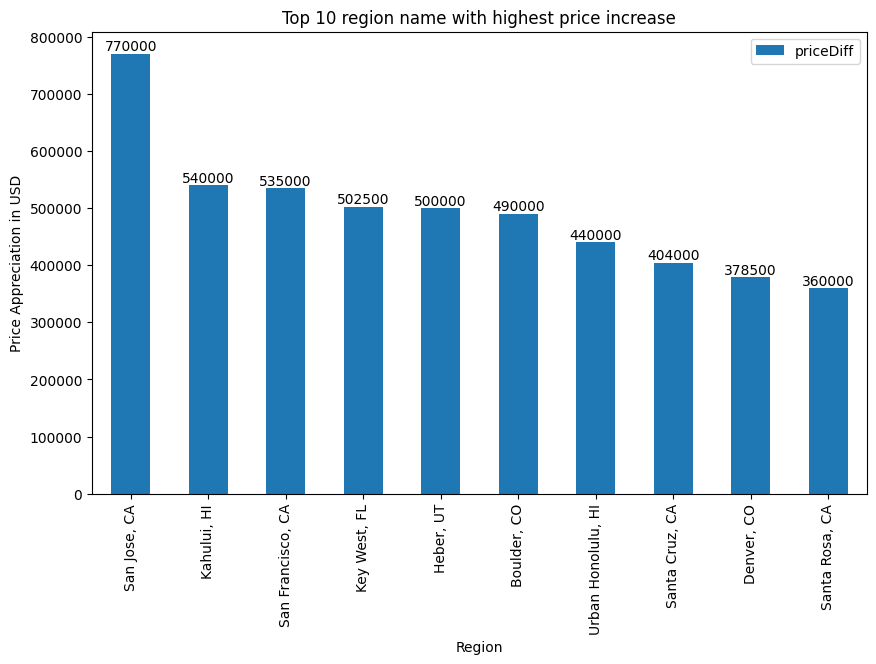

In [21]:
#sfr_countplot.plot(x="RegionName",y="priceDiff",kind="bar",title="Top 10 region name with highest price increase")
bar_plot = sfr_countplot.plot(x="RegionName",y="priceDiff",kind="bar",figsize=(10, 6))
bar_plot.set_title('Top 10 region name with highest price increase')
bar_plot.set_xlabel('Region')
bar_plot.set_ylabel('Price Appreciation in USD')
bar_plot.legend(loc='best')
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge')

The bar graph above indicates that San Jose, CA has the highest Price increase over the years from 2008 to Till date among the top 10 regions with the highest prices. We can consider San Jose, CA as a potential region for investment based on the property value appreciation. 

Now lets look at the return on investment for all the regions to calculate Risk vs Reward matrix.

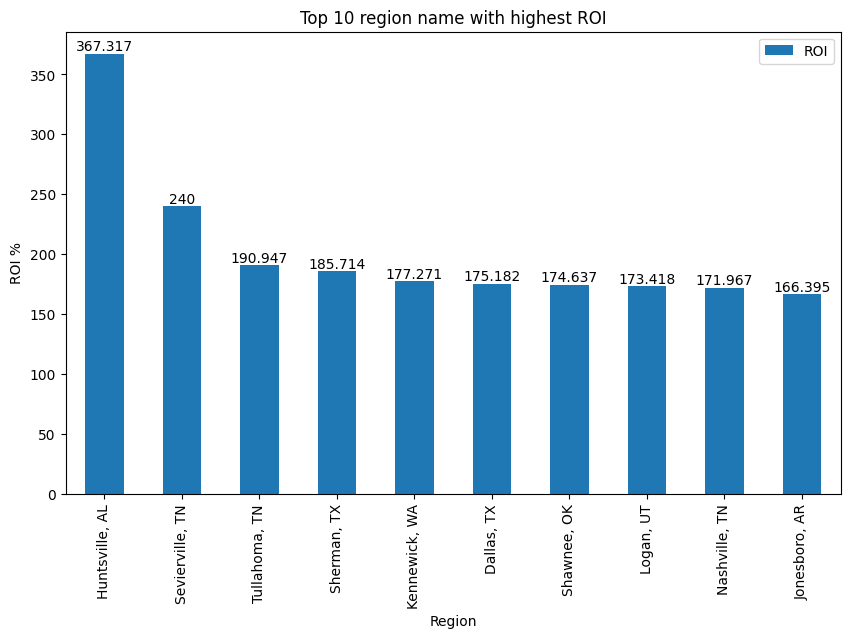

In [22]:
sfr_countplot_roi = sorted_sfr_temp2_ROI[["RegionName","priceDiff","ROI"]].head(10)
#sfr_countplot_roi.plot(x="RegionName",y="ROI",kind="bar",title="Top 10 region name with highest ROI")


bar_plot = sfr_countplot_roi.plot(x="RegionName",y="ROI",kind="bar",figsize=(10, 6))
bar_plot.set_title('Top 10 region name with highest ROI')
bar_plot.set_xlabel('Region')
bar_plot.set_ylabel('ROI %')
bar_plot.legend(loc='best')
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge')

As shown in above graph when it comes to Return on investment Huntsville, AL tops the place with whooping 367% ROI. We have other 9 region as well those can be potential region for the investment.

In [23]:
# Loading inventory listng data
base_sfr_invetory = pd.read_csv("Inventory_Sor Sale (Raw, SFR, Monthly).csv")
sfr_inventory_temp=base_sfr_invetory
#dropping columns RegionID, SizeRank, RegionType and StateName
sfr_inventory_temp = sfr_inventory_temp.drop(sfr_inventory_temp.columns[[0,1,3,4]], axis=1)

display(sfr_inventory_temp)

RegionName  2018-01-31  2018-02-28  2018-03-31  2018-04-30  \
0      United States   1206652.0   1224382.0   1339488.0   1416215.0   
1       New York, NY     49048.0     52266.0     56865.0     63067.0   
2    Los Angeles, CA     16116.0     17804.0     19556.0     20568.0   
3        Chicago, IL     27301.0     28861.0     33629.0     35088.0   
4         Dallas, TX     22001.0     22262.0     24620.0     27363.0   
..               ...         ...         ...         ...         ...   
923       Zapata, TX        58.0        53.0        55.0        57.0   
924    Ketchikan, AK        67.0        62.0        69.0        73.0   
925        Craig, CO       117.0       115.0       110.0       120.0   
926       Vernon, TX        22.0        20.0        20.0        39.0   
927       Lamesa, TX        31.0        35.0        39.0        32.0   

     2018-05-31  2018-06-30  2018-07-31  2018-08-31  2018-09-30  ...  \
0     1483192.0   1538378.0   1560834.0   1558260.0   1511467.0  ...   
1       67191.0     68929.0     68784.0     67281.0     66099.0  ...   
2       22343.0     23266.0     24581.0     24829.0     24470.0  ...   
3       36939.0     38536.0     39359.0     39289.0     38216.0  ...   
4       29136.0     31225.0     32979.0     32533.0     31031.0  ...   
..          ...         ...         ...         ...         ...  ...   
923        56.0        86.0        52.0        47.0        54.0  ...   
924        71.0        98.0       101.0       101.0        85.0  ...   
925       144.0       176.0       168.0       172.0       157.0  ...   
926        38.0        39.0        40.0        35.0        37.0  ...   
927        40.0        43.0        40.0        38.0        30.0  ...   

     2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0      996035.0   1010532.0    968943.0    948119.0    861922.0    755110.0   
1       40103.0     38833.0     37430.0     34520.0     31113.0     26041.0   
2       20168.0     20440.0     19012.0     18392.0     16707.0     13973.0   
3       31240.0     30997.0     29516.0     28064.0     24474.0     20296.0   
4       22289.0     22226.0     21561.0     20996.0     19442.0     17169.0   
..          ...         ...         ...         ...         ...         ...   
923        40.0        49.0        44.0        48.0        46.0        46.0   
924        60.0        57.0        63.0        58.0        51.0        50.0   
925        83.0        86.0        84.0        77.0        65.0        55.0   
926        28.0        37.0        42.0        47.0        49.0        39.0   
927        31.0        45.0        44.0        41.0        46.0        42.0   

     2023-01-31  2023-02-28  2023-03-31  2023-04-30  
0      743616.0    705544.0    754579.0    764945.0  
1       24585.0     23907.0     25444.0     25457.0  
2       13347.0     12816.0     13301.0     13073.0  
3       19668.0     18863.0     20491.0     20689.0  
4       16815.0     15185.0     16960.0     19467.0  
..          ...         ...         ...         ...  
923        51.0        49.0        47.0        55.0  
924        51.0        49.0        62.0        64.0  
925        45.0        46.0        54.0        67.0  
926        46.0        36.0        39.0        36.0  
927        40.0        37.0        33.0        31.0  

[928 rows x 65 columns]

In [24]:
sale_price_invetory=sorted_sfr_temp2[["RegionName","priceDiff","ROI"]].merge(base_sfr_invetory, left_on='RegionName', right_on='RegionName')
sale_price_invetory = sale_price_invetory.drop(sale_price_invetory.columns[[3,4,5,6]], axis=1)
inventory_final_list = sale_price_invetory.sort_values('priceDiff',ascending=False).head(10)
frames = [inventory_final_list,sale_price_invetory.sort_values('ROI',ascending=False).head(10)]
inventory_final_list = pd.concat(frames)
inventory_final_list

RegionName  priceDiff         ROI  2018-01-31  2018-02-28  \
0          San Jose, CA   770000.0  103.355705      1144.0      1492.0   
1           Kahului, HI   540000.0   88.524590       681.0       703.0   
2     San Francisco, CA   535000.0   86.991870      3140.0      4084.0   
3          Key West, FL   502500.0   87.391304      1495.0      1624.0   
4             Heber, UT   500000.0   88.105727       765.0       794.0   
5           Boulder, CO   490000.0  128.947368       708.0       748.0   
6    Urban Honolulu, HI   440000.0   82.242991      2936.0      3071.0   
7        Santa Cruz, CA   404000.0   56.821378       336.0       386.0   
8            Denver, CO   378500.0  164.565217      6158.0      6603.0   
9        Santa Rosa, CA   360000.0   82.758621       747.0       853.0   
51       Huntsville, AL   225900.0  367.317073      2786.0      2747.0   
18      Sevierville, TN   318000.0  240.000000       948.0       914.0   
112       Tullahoma, TN   162400.0  190.946502       494.0       509.0   
111         Sherman, TX   162500.0  185.714286       125.0       129.0   
42        Kennewick, WA   252540.0  177.270813       860.0       790.0   
46           Dallas, TX   240000.0  175.182482     22001.0     22262.0   
203         Shawnee, OK   114300.0  174.637128       340.0       342.0   
32            Logan, UT   274000.0  173.417722       248.0       237.0   
39        Nashville, TN   257950.0  171.966667      5823.0      5987.0   
159       Jonesboro, AR   132700.0  166.394984       698.0       691.0   

     2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  \
0        1954.0      2147.0      2536.0      2536.0      2654.0  ...   
1         726.0       684.0       631.0       613.0       631.0  ...   
2        5168.0      5714.0      6552.0      6569.0      6489.0  ...   
3        1631.0      1609.0      1626.0      1649.0      1641.0  ...   
4         896.0       931.0      1012.0      1120.0      1136.0  ...   
5         905.0      1075.0      1203.0      1263.0      1228.0  ...   
6        3353.0      3457.0      3542.0      3602.0      3701.0  ...   
7         481.0       511.0       597.0       599.0       694.0  ...   
8        8005.0      8856.0      9848.0     10758.0     10703.0  ...   
9        1023.0      1156.0      1288.0      1473.0      1601.0  ...   
51       2977.0      2794.0      2807.0      2849.0      2828.0  ...   
18        922.0       968.0       942.0       996.0      1020.0  ...   
112       530.0       522.0       531.0       542.0       554.0  ...   
111       120.0       134.0       146.0       195.0       800.0  ...   
42        878.0       963.0      1053.0      1106.0      1160.0  ...   
46      24620.0     27363.0     29136.0     31225.0     32979.0  ...   
203       373.0       408.0       383.0       400.0       420.0  ...   
32        296.0       340.0       399.0       477.0       454.0  ...   
39       6790.0      7404.0      7957.0      8495.0      8668.0  ...   
159       715.0       732.0       754.0       801.0       845.0  ...   

     2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0        2655.0      2509.0      2095.0      1873.0      1516.0      1111.0   
1         322.0       343.0       333.0       324.0       327.0       336.0   
2        7283.0      7024.0      6712.0      6451.0      5275.0      3669.0   
3         704.0       690.0       662.0       682.0       721.0       752.0   
4        1254.0      1289.0      1175.0      1110.0       995.0       874.0   
5        1228.0      1194.0      1124.0      1056.0       846.0       636.0   
6        1245.0      1276.0      1207.0      1254.0      1257.0      1108.0   
7         448.0       456.0       401.0       392.0       352.0       277.0   
8        9640.0      9573.0      9349.0      8747.0      7383.0      5869.0   
9         964.0       973.0       957.0       970.0       804.0       619.0   
51       1508.0      1556.0      1621.0      1635.0      1544.0      1406.0 

Apart from the increase in sales price and ROI, it is also essential to consider the number of open listings available in a particular region. Having more open listings can provide more options and bargaining opportunities for buyers. Therefore, it is necessary to examine the inventory data across all regions.

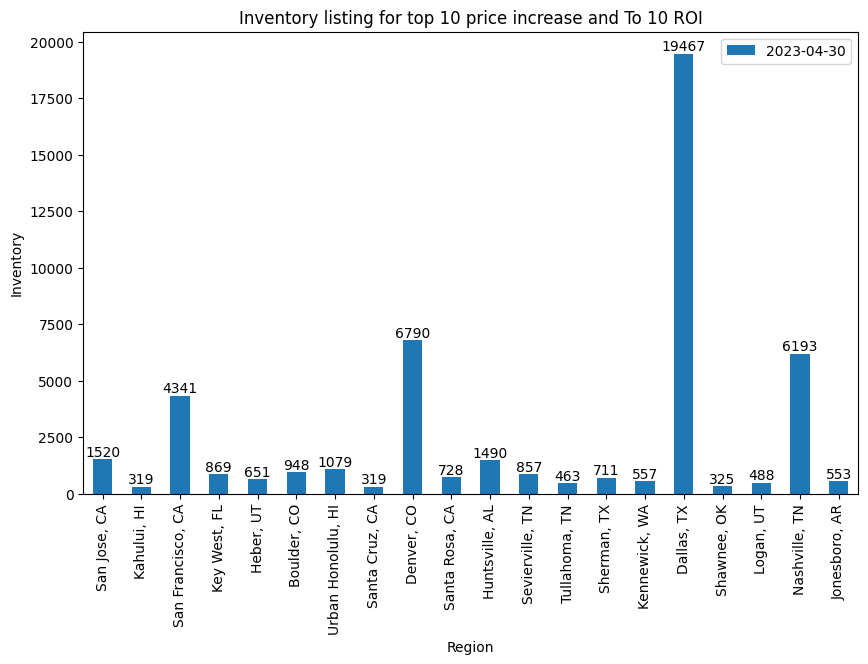

In [25]:
sfr_countplot_inventory = inventory_final_list[["RegionName","2023-04-30"]]
bar_plot = sfr_countplot_inventory.plot(x="RegionName",y="2023-04-30",kind="bar",figsize=(10, 6))
bar_plot.set_title('Inventory listing for top 10 price increase and To 10 ROI')
bar_plot.set_xlabel('Region')
bar_plot.set_ylabel('Inventory')
bar_plot.legend(loc='best')
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge')

Based on the graph showing the top 10 regions with the highest sales price increase and ROI, it can be observed that Dallas, TX currently has the highest number of open listings. Dallas, TX has good ROI of 175%.


#SFR-San Jose, CA - Best price increase from 2008 till date - 770K USD
#SFR-Huntsville, AL - Best return on investment from 2008 till date - 367%
#SFR-Dallas, TX - Best region with highest amount of inventory available - 19K+

Now look at the trend for sales price and inventory for Top 3 potential region for investment.

Text(0.5, 1.0, 'Comparison of Recomendations')

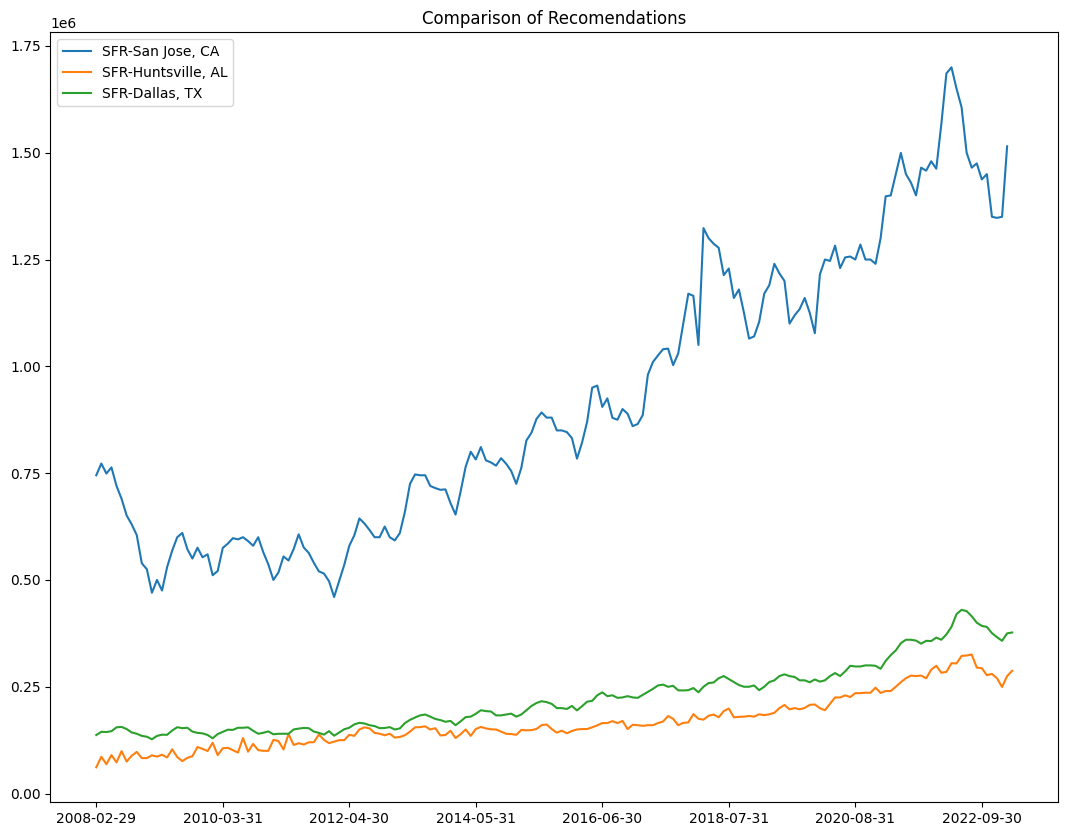

In [26]:
sfr_sanjose = sfr_data_transpose["San Jose, CA"]
sfr_huntsville = sfr_data_transpose["Huntsville, AL"]
sfr_dallas = sfr_data_transpose["Dallas, TX"]
sfr_sanjose=sfr_sanjose.dropna()
sfr_huntsville=sfr_huntsville.dropna()
sfr_dallas=sfr_dallas.dropna()

plt.figure(figsize=(13,10))
sfr_sanjose.plot(label="SFR-San Jose, CA")
sfr_huntsville.plot(label="SFR-Huntsville, AL")
sfr_dallas.plot(label="SFR-Dallas, TX")
plt.legend()
plt.title("Comparison of Recomendations")

In [27]:
#converting inventory_final_list to plot time-series data
tranpose_inventory= inventory_final_list.loc[:, ~inventory_final_list.columns.isin(['priceDiff', 'ROI'])]
all_columns_inventory = list(tranpose_inventory.columns)
tranpose_inventory=tranpose_inventory.to_numpy()
tranpose_inventory=pd.DataFrame(tranpose_inventory.T, index = all_columns_inventory)
tranpose_inventory.columns=tranpose_inventory.iloc[0]
tranpose_inventory.drop(index=tranpose_inventory.index[0], axis = 0, inplace = True)
tranpose_inventory

RegionName San Jose, CA Kahului, HI San Francisco, CA Key West, FL Heber, UT  \
2018-01-31       1144.0       681.0            3140.0       1495.0     765.0   
2018-02-28       1492.0       703.0            4084.0       1624.0     794.0   
2018-03-31       1954.0       726.0            5168.0       1631.0     896.0   
2018-04-30       2147.0       684.0            5714.0       1609.0     931.0   
2018-05-31       2536.0       631.0            6552.0       1626.0    1012.0   
...                 ...         ...               ...          ...       ...   
2022-12-31       1111.0       336.0            3669.0        752.0     874.0   
2023-01-31       1088.0       332.0            3300.0        847.0     817.0   
2023-02-28       1262.0       337.0            3578.0        864.0     768.0   
2023-03-31       1425.0       334.0            4060.0        870.0     803.0   
2023-04-30       1520.0       319.0            4341.0        869.0     651.0   

RegionName Boulder, CO Urban Honolulu, HI Santa Cruz, CA Denver, CO  \
2018-01-31       708.0             2936.0          336.0     6158.0   
2018-02-28       748.0             3071.0          386.0     6603.0   
2018-03-31       905.0             3353.0          481.0     8005.0   
2018-04-30      1075.0             3457.0          511.0     8856.0   
2018-05-31      1203.0             3542.0          597.0     9848.0   
...                ...                ...            ...        ...   
2022-12-31       636.0             1108.0          277.0     5869.0   
2023-01-31       584.0             1164.0          230.0     5655.0   
2023-02-28       644.0             1375.0          257.0     5448.0   
2023-03-31       786.0             1105.0          273.0     6388.0   
2023-04-30       948.0             1079.0          319.0     6790.0   

RegionName Santa Rosa, CA Huntsville, AL Sevierville, TN Tullahoma, TN  \
2018-01-31          747.0         2786.0           948.0         494.0   
2018-02-28          853.0         2747.0           914.0         509.0   
2018-03-31         1023.0         2977.0           922.0         530.0   
2018-04-30         1156.0         2794.0           968.0         522.0   
2018-05-31         1288.0         2807.0           942.0         531.0   
...                   ...            ...             ...           ...   
2022-12-31          619.0         1406.0           823.0         485.0   
2023-01-31          529.0         1552.0           783.0         501.0   
2023-02-28          560.0         1477.0           757.0         469.0   
2023-03-31          635.0         1562.0           815.0         478.0   
2023-04-30          728.0         1490.0           857.0         463.0   

RegionName Sherman, TX Kennewick, WA Dallas, TX Shawnee, OK Logan, UT  \
2018-01-31       125.0         860.0    22001.0       340.0     248.0   
2018-02-28       129.0         790.0    22262.0       342.0     237.0   
2018-03-31       120.0         878.0    24620.0       373.0     296.0   
2018-04-30       134.0         963.0    27363.0       408.0     340.0   
2018-05-31       146.0        1053.0    29136.0       383.0     399.0   
...                ...           ...        ...         ...       ...   
2022-12-31       574.0         529.0    17169.0       351.0     516.0   
2023-01-31       595.0         518.0    16815.0       350.0     478.0   
2023-02-28       553.0         492.0    15185.0       304.0     479.0   
2023-03-31       591.0         532.0    16960.0       309.0     531.0   
2023-04-30       711.0         557.0    19467.0       325.0     488.0   

RegionName Nashville, TN Jonesboro, AR  
2018-01-31        5823.0         698.0  
2018-02-28        5987.0         691.0  
2018-03-31        6790.0         715.0  
2018-04-30        7404.0         732.0  
2018-05-31        7957.0         754.0  
...                  ...           ...  
2022-12-31        6063.0         528.0  
2023-01-31        6028.0         539.0  
2023-02-28        5631.0         535.0  
2023-03-31

In [28]:
inventory_sanjose = tranpose_inventory["San Jose, CA"]
inventory_huntsville = tranpose_inventory["Huntsville, AL"]
inventory_dallas = tranpose_inventory["Dallas, TX"]
inventory_sanjose=inventory_sanjose.dropna()
inventory_huntsville=inventory_huntsville.dropna()
inventory_dallas=inventory_dallas.dropna()
inventory_sanjose

2018-01-31    1144.0
2018-02-28    1492.0
2018-03-31    1954.0
2018-04-30    2147.0
2018-05-31    2536.0
               ...  
2022-12-31    1111.0
2023-01-31    1088.0
2023-02-28    1262.0
2023-03-31    1425.0
2023-04-30    1520.0
Name: San Jose, CA, Length: 64, dtype: object

Text(0.5, 1.0, 'Comparison of Recomendations')

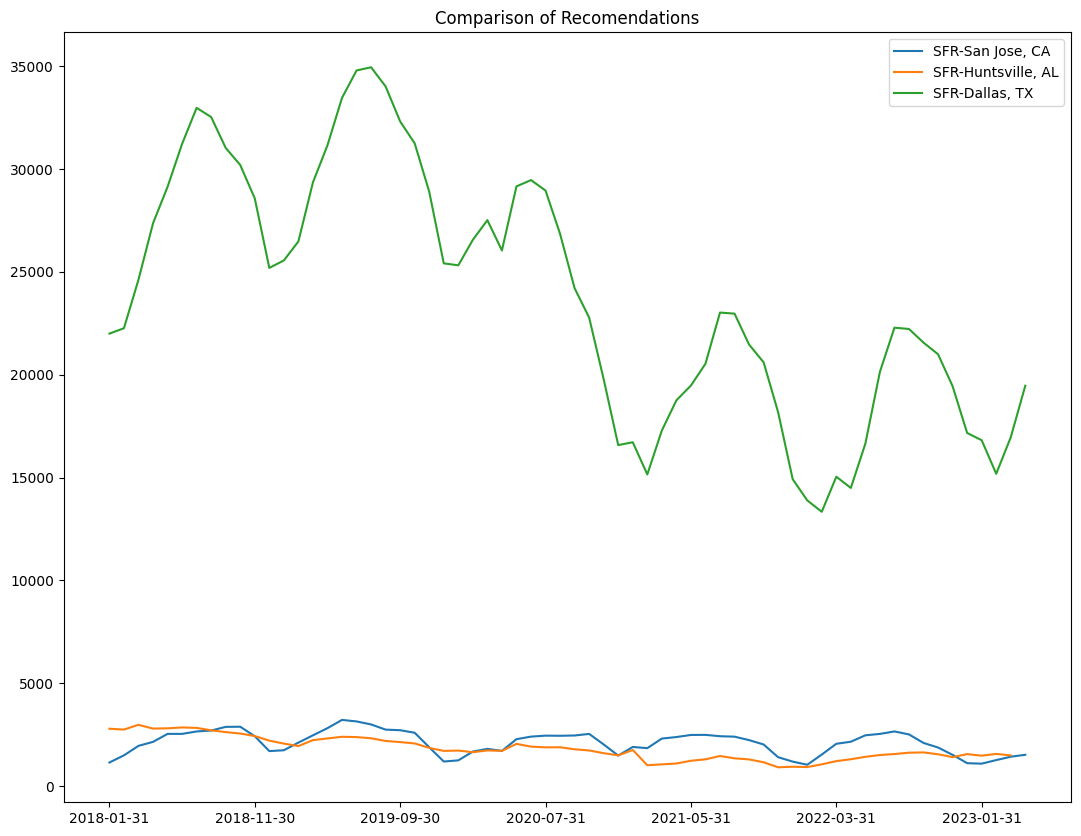

In [29]:
plt.figure(figsize=(13,10))
inventory_sanjose.plot(label="SFR-San Jose, CA")
inventory_huntsville.plot(label="SFR-Huntsville, AL")
inventory_dallas.plot(label="SFR-Dallas, TX")
plt.legend()
plt.title("Comparison of Recomendations")

The time series graph clearly shows that San Jose, CA is flat on Inventory same as Huntsville, AL. However if you look at Dallas, TX the inventory is on upwonrd trend.

Recommendations: According to the graph, Dallas Tx has been experiencing an upward trend in home value appreciation and inventory.Based on Sales and Inventory data available, we would recommend to consider investing in Dallas, Tx. 

## 3. Should I wait to invest or not?

In [30]:
# Inventory: Days to Pending
# Data type: Median days to pending (raw, all homes, monthly)
days_to_pending = pd.read_csv('Metro_med_doz_pending_uc_sfrcondo_month.csv')
display(days_to_pending)

RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
0      102001         0    United States    country       NaN        47.0   
1      394913         1     New York, NY        msa        NY        86.0   
2      753899         2  Los Angeles, CA        msa        CA        21.0   
3      394463         3      Chicago, IL        msa        IL        57.0   
4      394514         4       Dallas, TX        msa        TX        37.0   
..        ...       ...              ...        ...       ...         ...   
771    395003       912        Price, UT        msa        UT         NaN   
772    786263       913      Ruidoso, NM        msa        NM         NaN   
773    786257       914     Fairmont, MN        msa        MN         NaN   
774    395112       922  Spirit Lake, IA        msa        IA         NaN   
775    753880       930    Fairfield, IA        msa        IA         NaN   

     2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2022-06-30  \
0          25.0        20.0        18.0        18.0  ...         8.0   
1          51.0        37.0        41.0        37.0  ...        26.0   
2          14.0        15.0        14.0        15.0  ...        13.0   
3          23.0        15.0        14.0        15.0  ...         7.0   
4          24.0        21.0        19.0        20.0  ...         7.0   
..          ...         ...         ...         ...  ...         ...   
771         NaN         NaN         NaN         NaN  ...         NaN   
772         NaN         NaN         NaN         NaN  ...         NaN   
773         NaN         NaN         NaN         NaN  ...         NaN   
774         NaN         NaN         NaN         NaN  ...         NaN   
775         NaN         NaN         NaN         NaN  ...         NaN   

     2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0          12.0        15.0        17.0        18.0        22.0        31.0   
1          31.0        34.0        38.0        33.0        37.0        47.0   
2          17.0        21.0        22.0        22.0        25.0        35.0   
3          11.0        14.0        16.0        16.0        21.0        33.0   
4          10.0        14.0        16.0        17.0        22.0        30.0   
..          ...         ...         ...         ...         ...         ...   
771         NaN         NaN         NaN         NaN         NaN         NaN   
772         NaN         NaN         NaN         NaN         NaN         NaN   
773         NaN         NaN         NaN         NaN         NaN         NaN   
774         NaN         NaN         NaN         NaN         NaN         NaN   
775         NaN         NaN         NaN         NaN         NaN         NaN   

     2023-01-31  2023-02-28  2023-03-31  
0          31.0        17.0        13.0  
1          56.0        33.0        25.0  
2          35.0        19.0        15.0  
3          26.0        12.0         8.0  
4          34.0        17.0        11.0  
..          ...         ...         ...  
771         NaN         NaN        15.0  
772         NaN         NaN        51.0  
773         NaN        21.0        17.0  
774         NaN         NaN        49.0  
775         NaN         NaN        14.0  

[776 rows x 68 columns]

In [31]:
data_per_year = {'2018':pd.date_range(start='2018-01-31',end='2018-12-31',freq='M'),
                '2019':pd.date_range(start='2019-01-31',end='2019-12-31',freq='M'),
                '2020':pd.date_range(start='2020-01-31',end='2020-12-31',freq='M'),
                '2021':pd.date_range(start='2021-01-31',end='2021-12-31',freq='M'),
                '2022':pd.date_range(start='2022-01-31',end='2022-12-31',freq='M'),
                '2023':pd.date_range(start='2023-01-31',end='2023-03-31',freq='M')}
# display(data_per_year)

In [32]:
# Create two dictionaries:
outlier_dict = dict(zip(days_to_pending['RegionID'],days_to_pending['RegionName']))    
# display(outlier_dict)
outlier_state = dict(zip(days_to_pending['RegionID'],days_to_pending['StateName']))    
# display(outlier_state)

In [33]:
#Size ranks the zip codes by urbanization.
#More urbanized zip codes have a higher rank
dfrm = days_to_pending[days_to_pending.SizeRank <= 100].T
cols = dfrm.loc['RegionName'].tolist()
dfrm = dfrm.iloc[5:]
dfrm.columns = cols
dfrm.index = pd.to_datetime(dfrm.index)
display(dfrm)

United States New York, NY Los Angeles, CA Chicago, IL Dallas, TX  \
2018-01-31          47.0         86.0            21.0        57.0       37.0   
2018-02-28          25.0         51.0            14.0        23.0       24.0   
2018-03-31          20.0         37.0            15.0        15.0       21.0   
2018-04-30          18.0         41.0            14.0        14.0       19.0   
2018-05-31          18.0         37.0            15.0        15.0       20.0   
...                  ...          ...             ...         ...        ...   
2022-11-30          22.0         37.0            25.0        21.0       22.0   
2022-12-31          31.0         47.0            35.0        33.0       30.0   
2023-01-31          31.0         56.0            35.0        26.0       34.0   
2023-02-28          17.0         33.0            19.0        12.0       17.0   
2023-03-31          13.0         25.0            15.0         8.0       11.0   

           Houston, TX Washington, DC Philadelphia, PA Miami, FL Atlanta, GA  \
2018-01-31        40.0           51.0             63.0      51.0        27.0   
2018-02-28        25.0           33.0             45.0      41.0        14.0   
2018-03-31        17.0           27.0             29.0      37.0        12.0   
2018-04-30        16.0           20.0             24.0      39.0        10.0   
2018-05-31        16.0           26.0             28.0      38.0        11.0   
...                ...            ...              ...       ...         ...   
2022-11-30        27.0           20.0             14.0      27.0        26.0   
2022-12-31        34.0           28.0             20.0      33.0        36.0   
2023-01-31        39.0           16.0             16.0      37.0        37.0   
2023-02-28        25.0            7.0             10.0      30.0        20.0   
2023-03-31        17.0            6.0              8.0      28.0        13.0   

            ... Syracuse, NY Provo, UT Toledo, OH Wichita, KS Durham, NC  \
2018-01-31  ...         91.0      34.0       68.0        57.0       23.0   
2018-02-28  ...         80.0      13.0       35.0        42.0        8.0   
2018-03-31  ...         55.0      13.0       25.0        23.0        7.0   
2018-04-30  ...         38.0       9.0       14.0        21.0        6.0   
2018-05-31  ...         34.0      14.0       11.0        19.0        7.0   
...         ...          ...       ...        ...         ...        ...   
2022-11-30  ...         10.0       NaN       10.0        11.0        NaN   
2022-12-31  ...         13.0      45.0       15.0        13.0        NaN   
2023-01-31  ...          9.0      50.0       18.0         9.0       25.0   
2023-02-28  ...          6.0      27.0        7.0         6.0        8.0   
2023-03-31  ...          6.0      18.0        5.0         5.0        5.0   

           Augusta, GA Palm Bay, FL Jackson, MS Harrisburg, PA Spokane, WA  
2018-01-31         NaN         40.0        66.0           63.0        63.0  
2018-02-28         NaN         24.0        42.0           54.0        44.0  
2018-03-31         NaN         26.0        40.0           19.0        23.0  
2018-04-30         NaN         24.0        32.0           10.0        20.0  
2018-05-31         NaN         23.0        28.0           17.0        20.0  
...                ...          ...         ...            ...         ...  
2022-11-30        12.0         24.0        14.0            7.0        29.0  
2022-12-31        20.0         31.0        23.0           10.0        41.0  
2023-01-31        19.0         33.0        19.0            9.0        47.0  
2023-02-28        12.0         20.0         9.0            6.0        14.0  
2023-03-31         7.0         19.0         9.0            5.0         7.0  

[63 rows x 100 columns]

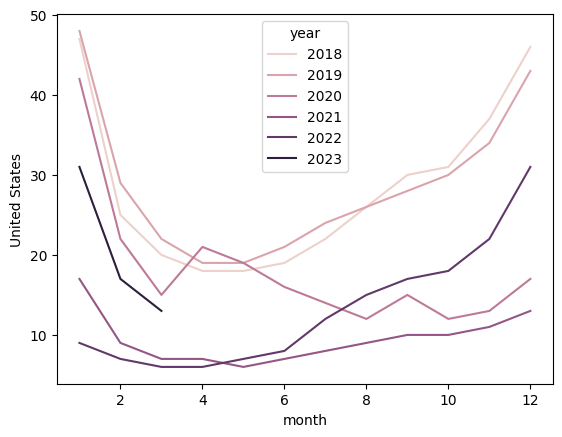

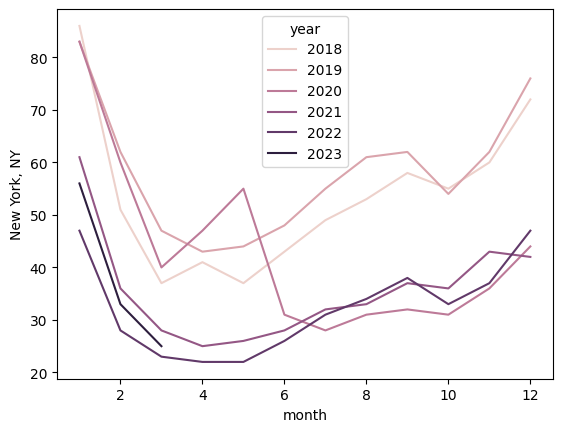

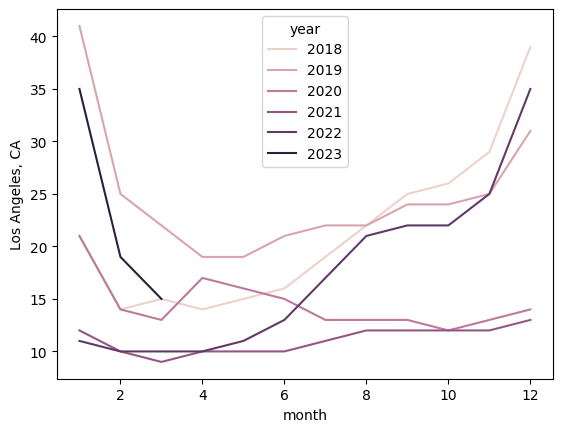

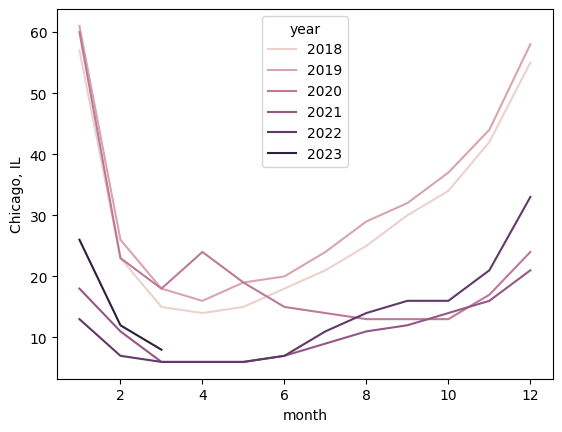

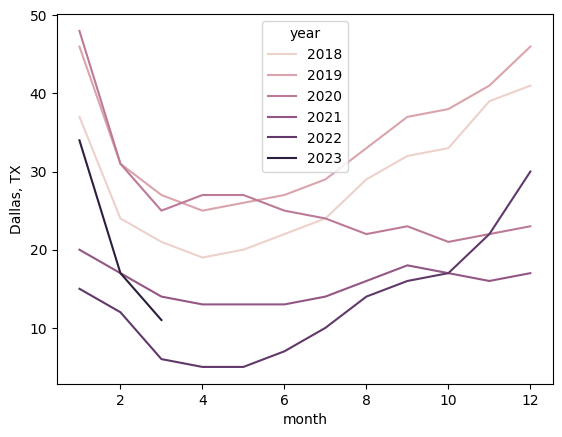

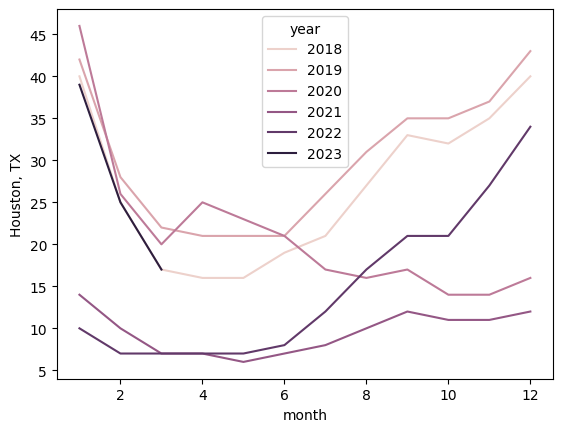

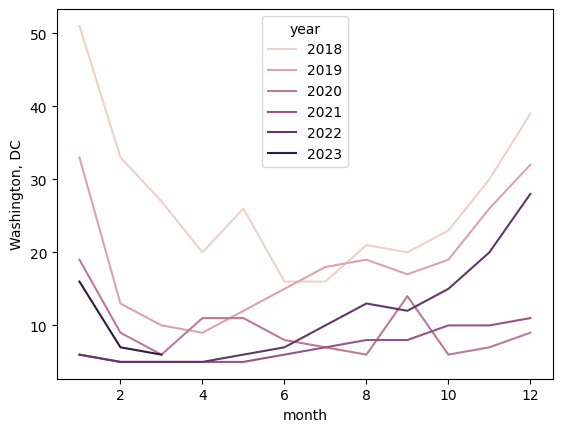

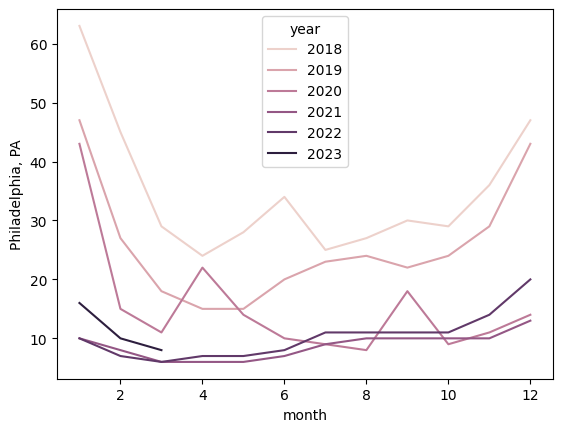

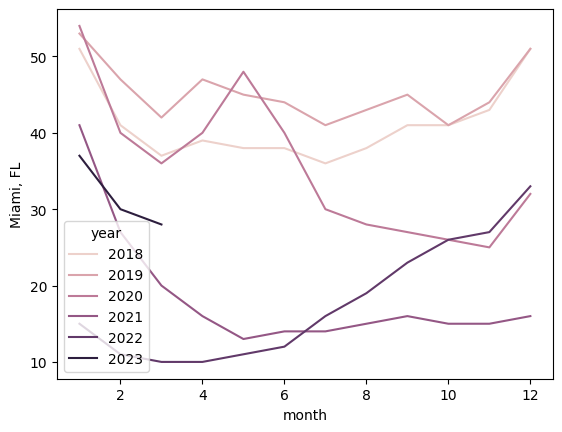

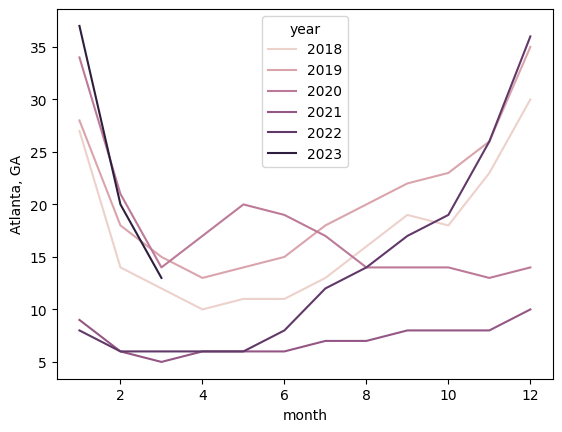

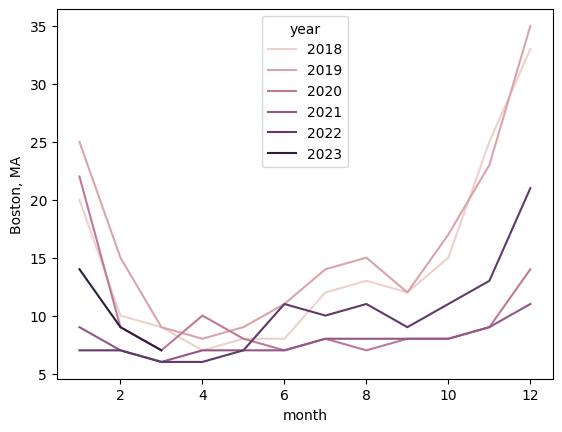

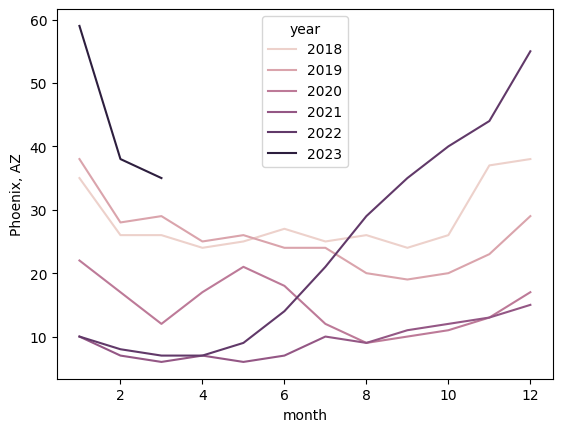

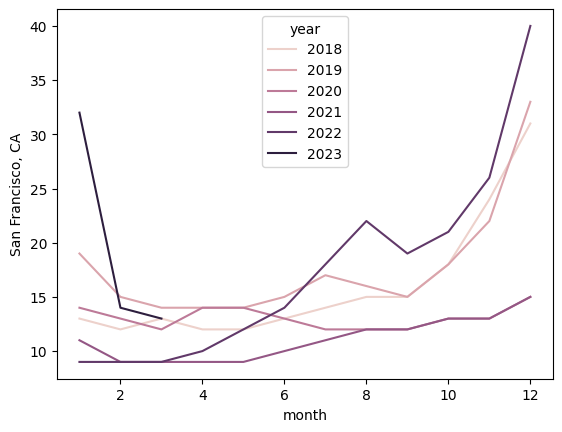

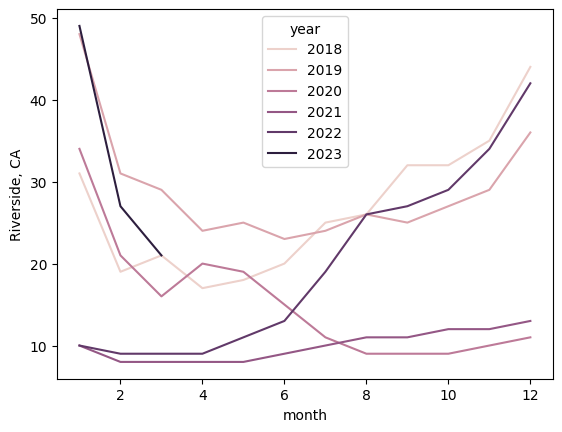

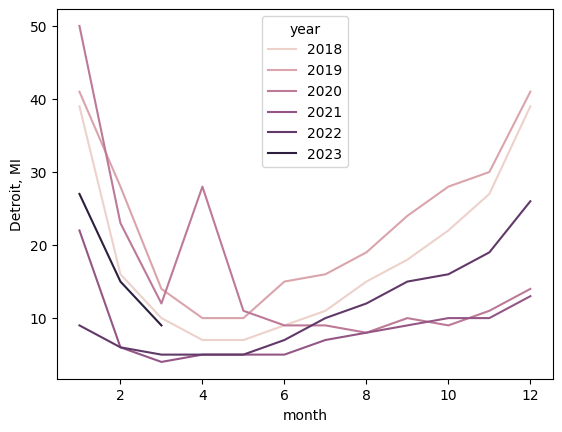

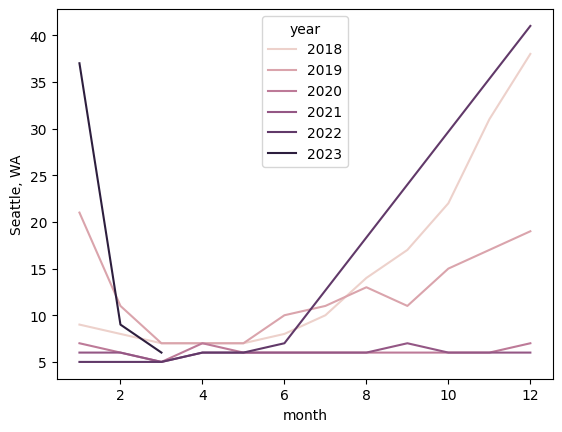

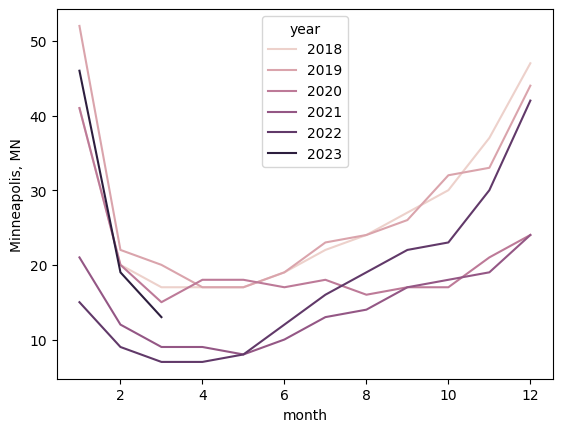

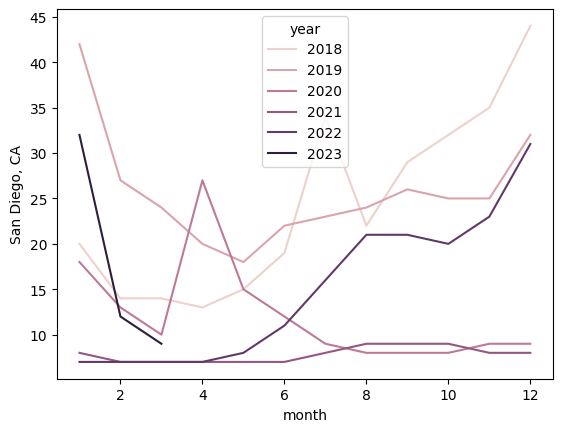

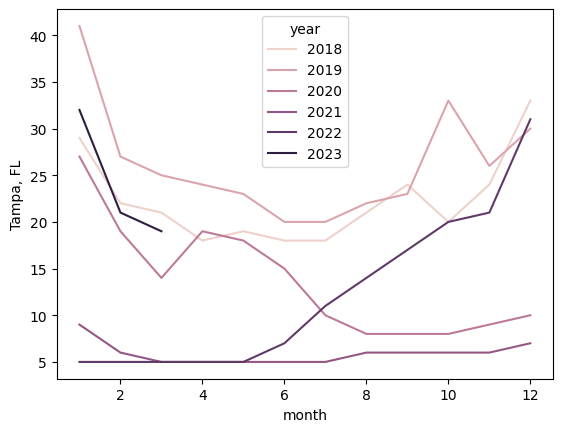

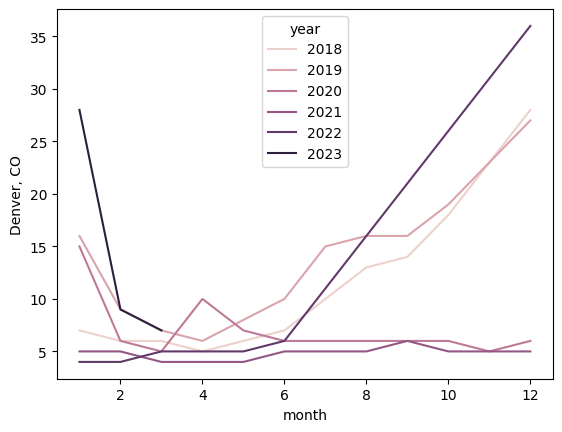

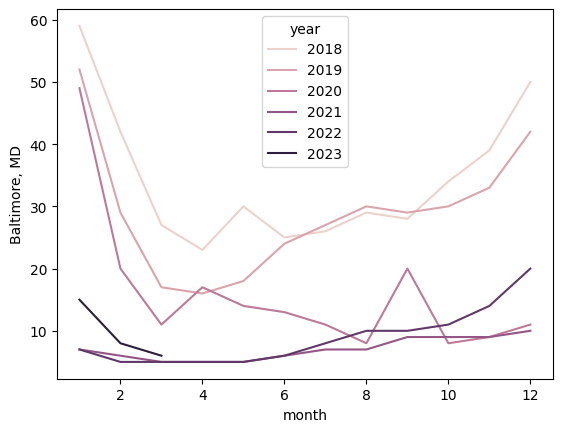

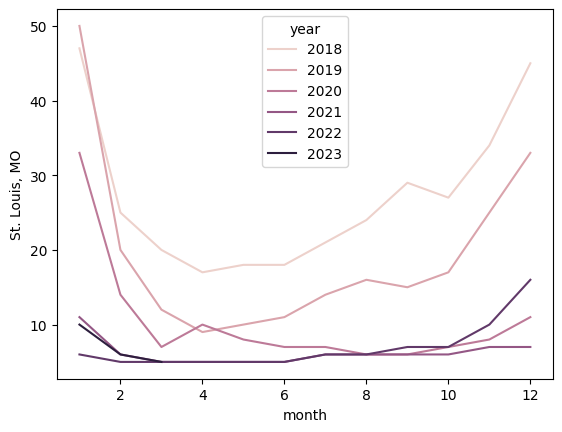

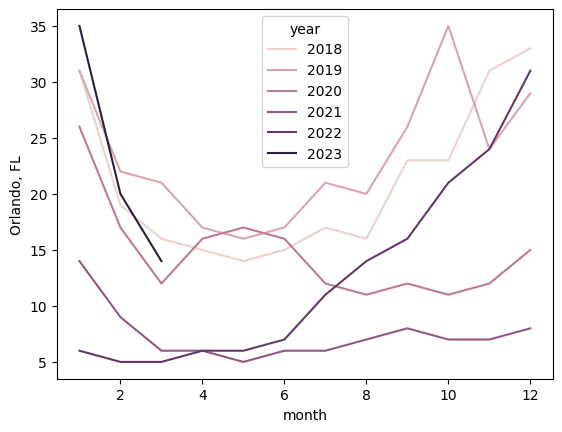

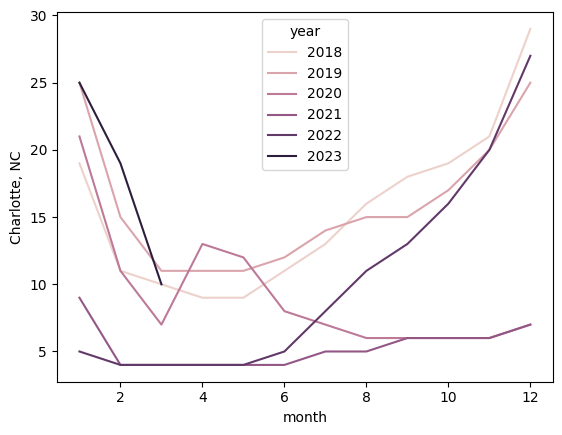

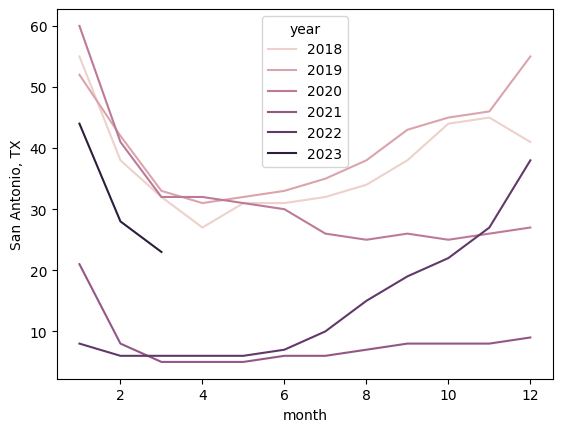

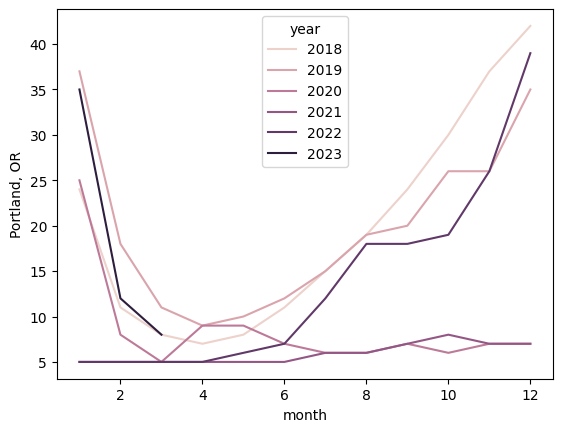

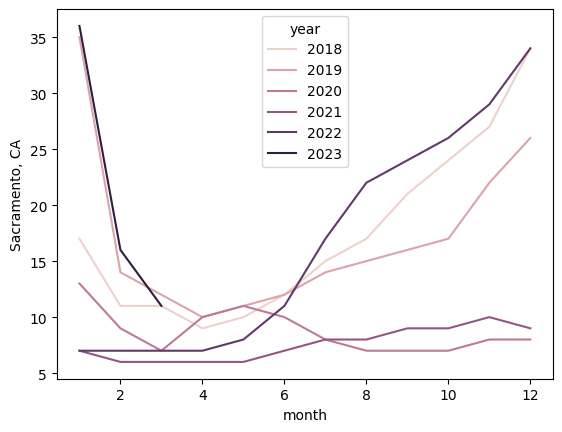

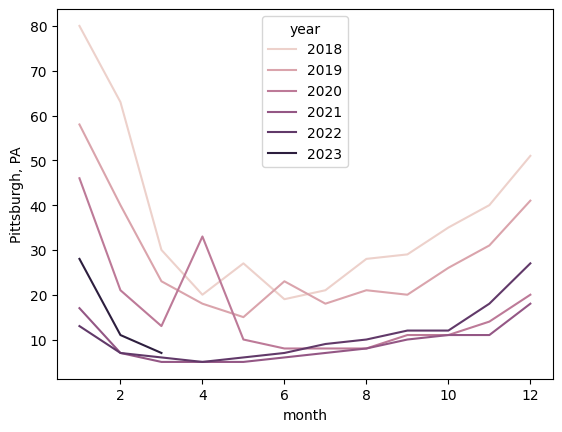

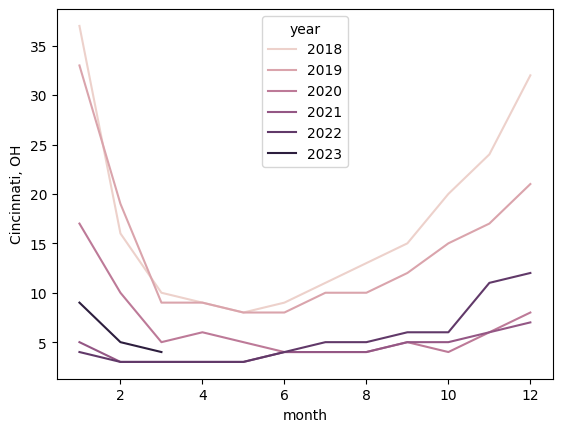

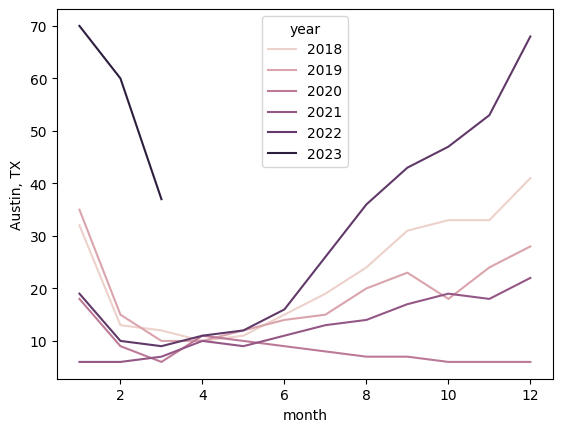

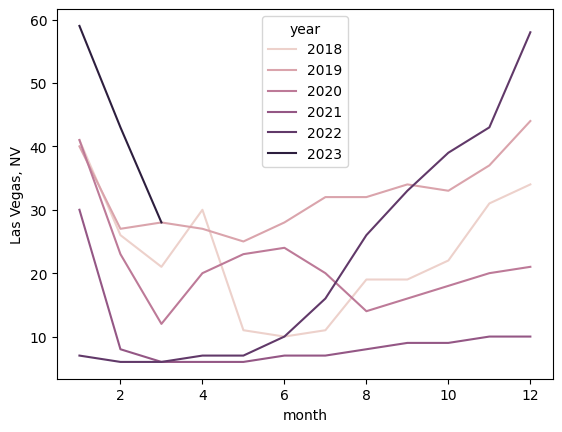

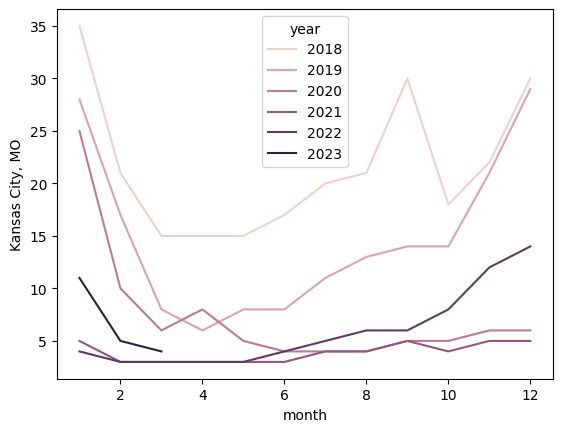

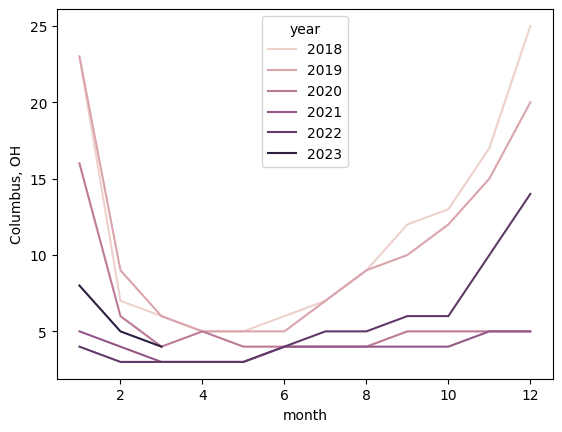

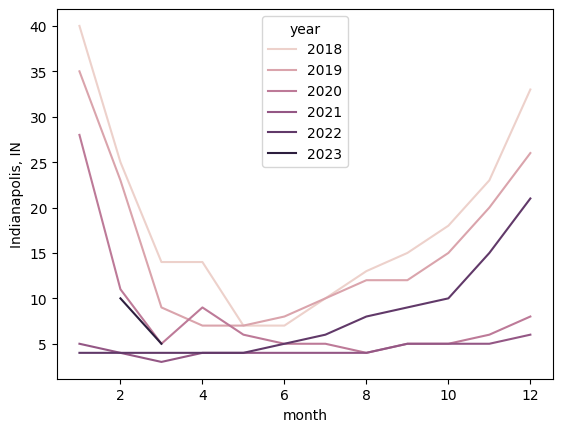

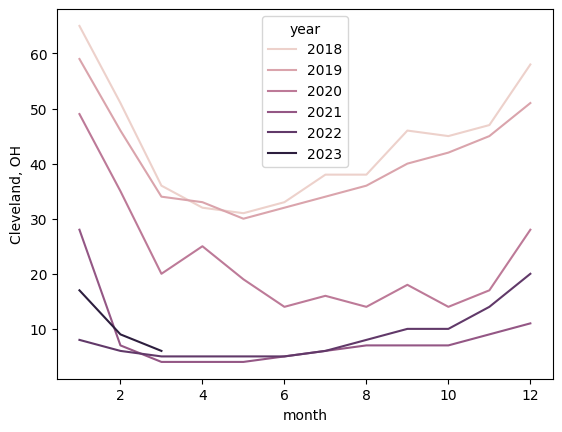

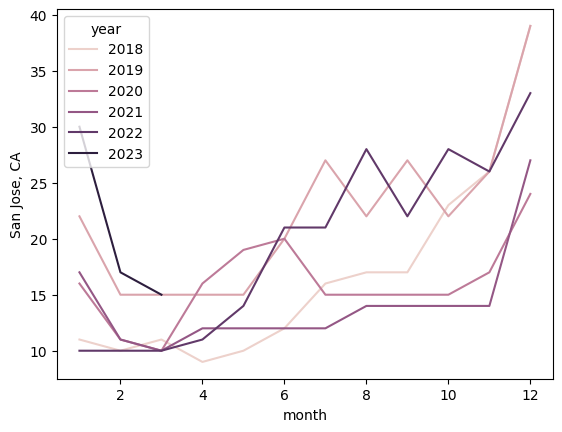

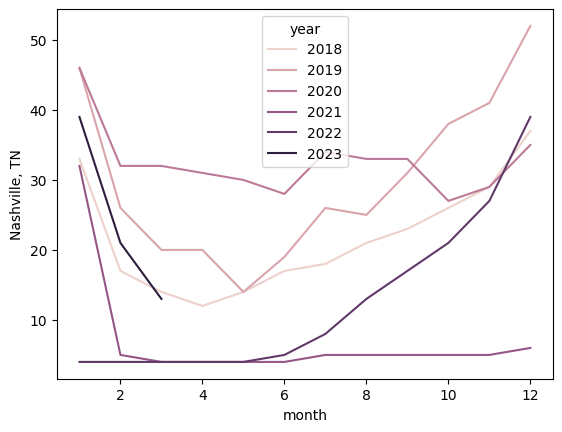

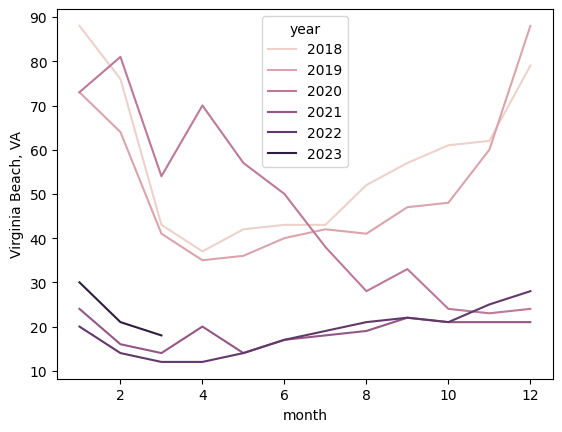

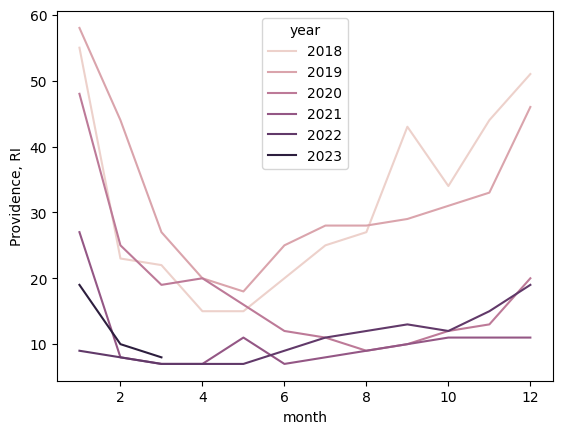

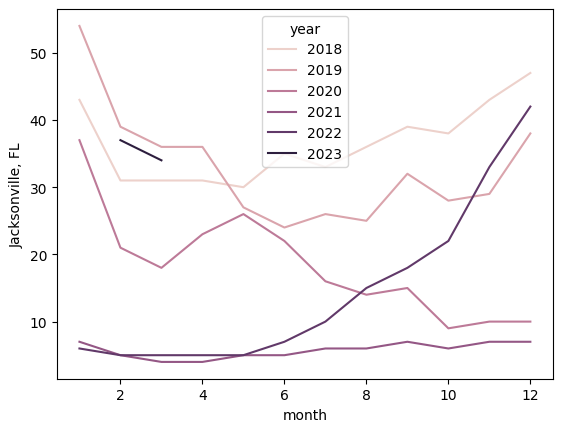

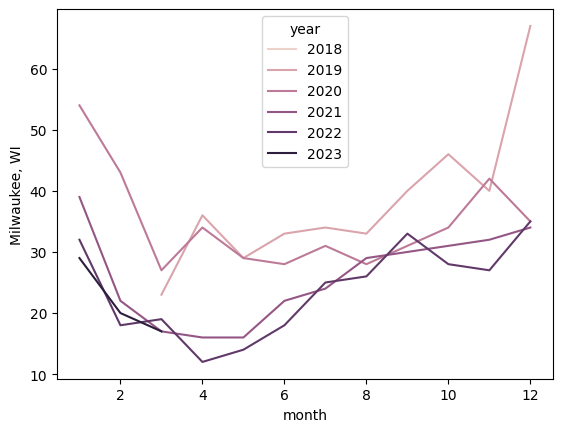

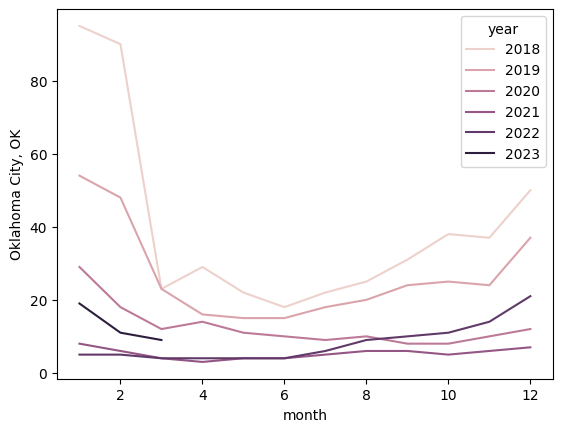

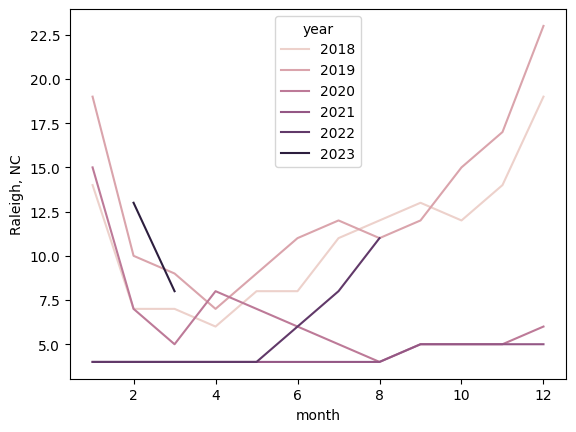

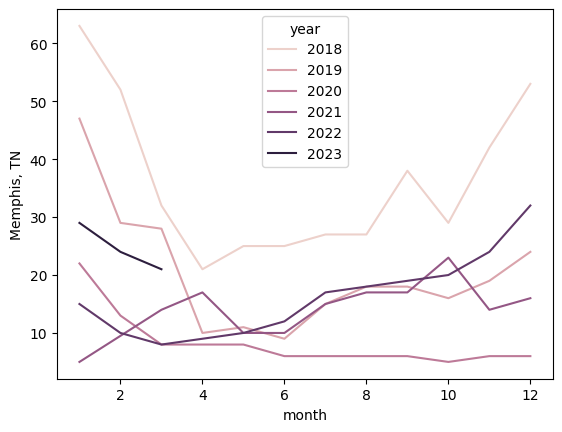

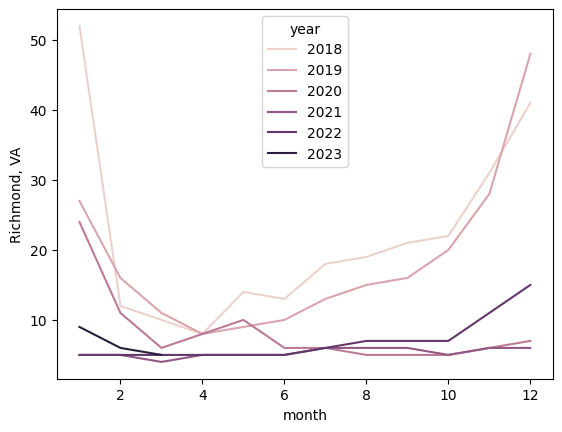

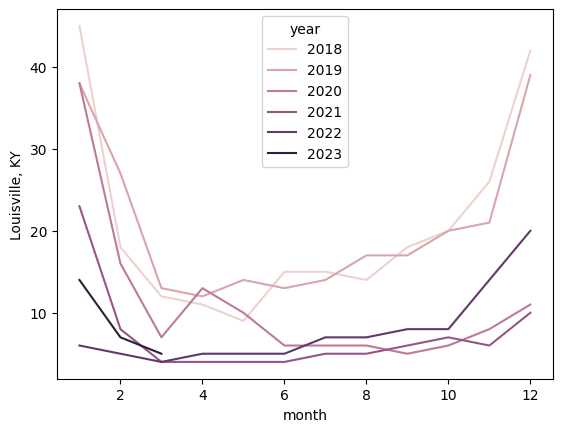

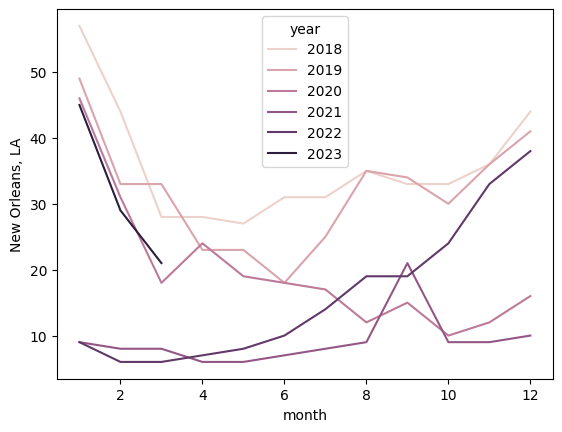

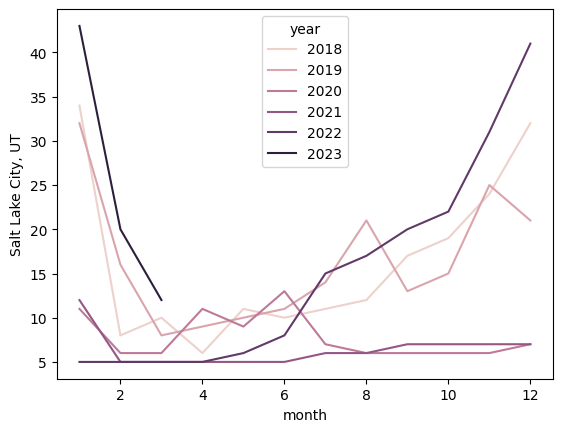

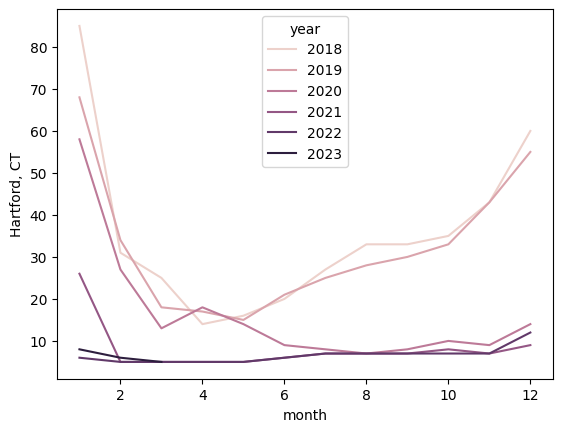

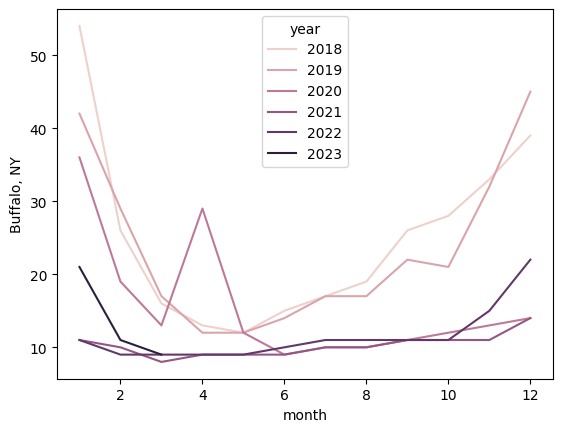

In [34]:
dfrm['month'] = pd.to_datetime(dfrm.index).month
dfrm['year'] = pd.to_datetime(dfrm.index).year
#plt.figure(figsize=(50, 50))
#fig, axes = plt.subplots(nrows = 10, ncols = 5)
l = [(j,k) for j in range(5) for k in range (10)]

for m,n in zip(range(len(dfrm.columns)),l):
    sns.lineplot(x='month',y=dfrm.iloc[:,m], hue='year',data=dfrm)#, ax = axes[n[0]][n[1]])
    plt.show()

- The graph illustrates the median duration, measured in days, for pending status of residential properties across major cities in all 50 states of the United States, spanning from January 2018 to March 2023.

- Upon analyzing the data, a distinct pattern emerges regarding the length of time houses remain on the market before transitioning to a pending status. Notably, a consistent downward trend is observed during the months of February to April and August to October. This downward slope suggests a reduction in the number of days it takes for houses to enter a pending state during these periods.

- Examining the pre-COVID-19 period, namely 2018 and 2019, we observe a steady pattern. The duration before a home's status changes to pending consistently remains high throughout the spring and early winter, while experiencing a decrease as the summer-fall season approaches.

- However, since the onset of 2020, the data exhibits frequent fluctuations. The median duration for pending status shows significant variation, with a peak of approximately 60 days during the initial two months, followed by a rapid decline for the remainder of the year. Notably, the lowest recorded duration falls below 10 days.

###### In conclusion, based on the analyzed data, there is evidence to suggest that investing in buying houses during the period from April to July could be a favorable decision. This conclusion is drawn from the observed trends in the days to pending data, where the number of days it takes for houses to enter a pending status tends to decrease during this time frame. 

## 4. Is the sqft price of the sale and listing ration going up or down?

In [35]:
df_r_median = pd.read_csv('./list-sale-prices/Metro_median_sale_to_list_uc_sfrcondo_month.csv')
df_r_median.head()

RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
0    102001         0    United States    country       NaN    0.982772   
1    394913         1     New York, NY        msa        NY    0.977621   
2    753899         2  Los Angeles, CA        msa        CA    0.998367   
3    394463         3      Chicago, IL        msa        IL    0.971984   
4    394514         4       Dallas, TX        msa        TX    0.988095   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2022-05-31  \
0    0.984410    0.988071    0.990654    0.992689  ...    1.015898   
1    0.976884    0.980000    0.979953    0.979982  ...    1.013203   
2    1.000000    1.000000    1.000000    1.000000  ...    1.041815   
3    0.972220    0.976812    0.979592    0.980777  ...    1.006024   
4    0.991245    0.995921    1.000000    1.000000  ...    1.049462   

   2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  \
0    1.010202    1.000000    1.000000    1.000000    1.000000    0.992080   
1    1.018182    1.017214    1.009524    1.000003    1.000000    1.000000   
2    1.026080    1.006386    1.000000    1.000000    0.999268    0.993289   
3    1.007895    1.000371    1.000000    1.000000    0.991089    0.988468   
4    1.033333    1.010767    1.000000    1.000000    0.991089    0.988134   

   2022-12-31  2023-01-31  2023-02-28  
0    0.987747    0.984982    0.987671  
1    1.000000    0.993486    0.988623  
2    0.990000    0.987145    0.993681  
3    0.985158    0.982456    0.985196  
4    0.984848    0.981777    0.985996  

[5 rows x 67 columns]

In [36]:
def transdf(df,sizeRank):

    df = df[df.SizeRank <= sizeRank].T
    cols = df.loc['RegionName'].tolist()
    df = df.iloc[5:]
    df.columns = cols
    df.index = pd.to_datetime(df.index)


    return df

In [37]:
dates_dict = {'2018':pd.date_range(start='2018-01-31',end='2018-12-31',freq='M'),
              '2019':pd.date_range(start='2019-01-31',end='2019-12-31',freq='M'),
              '2020':pd.date_range(start='2020-01-31',end='2020-12-31',freq='M'),
              '2021':pd.date_range(start='2021-01-31',end='2021-12-31',freq='M'),
              '2022':pd.date_range(start='2022-01-31',end='2022-12-31',freq='M'),
              '2023':pd.date_range(start='2023-01-31',end='2023-02-28',freq='M')}

In [38]:
dfrm = transdf(df_r_median,11) # Looking at top 10 largest metros plus US
dfrm

United States New York, NY Los Angeles, CA Chicago, IL Dallas, TX  \
2018-01-31      0.982772     0.977621        0.998367    0.971984   0.988095   
2018-02-28       0.98441     0.976884             1.0     0.97222   0.991245   
2018-03-31      0.988071         0.98             1.0    0.976812   0.995921   
2018-04-30      0.990654     0.979953             1.0    0.979592        1.0   
2018-05-31      0.992689     0.979982             1.0    0.980777        1.0   
...                  ...          ...             ...         ...        ...   
2022-10-31           1.0          1.0        0.999268    0.991089   0.991089   
2022-11-30       0.99208          1.0        0.993289    0.988468   0.988134   
2022-12-31      0.987747          1.0            0.99    0.985158   0.984848   
2023-01-31      0.984982     0.993486        0.987145    0.982456   0.981777   
2023-02-28      0.987671     0.988623        0.993681    0.985196   0.985996   

           Houston, TX Washington, DC Philadelphia, PA Miami, FL Atlanta, GA  \
2018-01-31    0.976331       0.992134         0.979196  0.963636    0.983084   
2018-02-28    0.976039            1.0         0.981735  0.965251    0.986808   
2018-03-31    0.977778            1.0         0.982906  0.964706    0.989583   
2018-04-30    0.981521            1.0         0.985584  0.967931    0.994819   
2018-05-31    0.981982            1.0         0.989189  0.966129    0.997333   
...                ...            ...              ...       ...         ...   
2022-10-31    0.986301            1.0              1.0  0.979575         1.0   
2022-11-30    0.983393            1.0              1.0  0.974286    0.992686   
2022-12-31    0.981183            1.0              1.0  0.973127    0.989362   
2023-01-31    0.979271            1.0              1.0  0.970514      0.9875   
2023-02-28    0.981761            1.0              1.0  0.970213    0.992308   

           Boston, MA Phoenix, AZ  
2018-01-31   0.989164    0.985366  
2018-02-28   0.990676    0.985481  
2018-03-31   0.996516    0.988701  
2018-04-30        1.0    0.991304  
2018-05-31   1.000256    0.989831  
...               ...         ...  
2022-10-31   1.000067     0.98565  
2022-11-30        1.0    0.982498  
2022-12-31        1.0     0.97843  
2023-01-31   0.994258    0.979532  
2023-02-28        1.0    0.983784  

[62 rows x 12 columns]

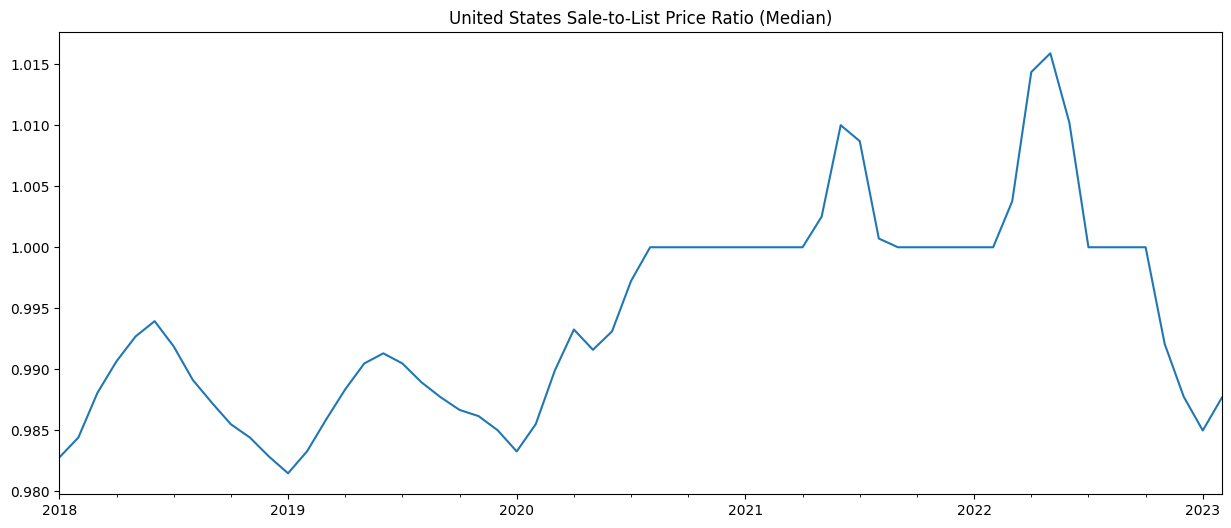

In [39]:
dfrm['United States'].plot(figsize=(15,6),title='United States Sale-to-List Price Ratio (Median)');

Taking a look at the plot covering the entire United States, we can see that the sale-to-list price ratio (median) has had some significant movement since 2018. At first glance, we can identify some trends that are common for the years 2018, 2019, 2021, and 2022. 2020 can be considered an anomalous year due to the impact of the COVID-19 Pandemic on the housing market, so that won't be used for consideration. However, you can see seasonaly trends in the data showing the sale-to-list price ratio increases from the start of each year up until the summer where it then begins to decline. 

What this means is that as the annual temps begin to heat up, so to do home sale prices. This is likely due to interested buyers coming out in greater numbers increasing competition within the home buying market. When the sale-to-list price ratio is higher than 1, this is saying that the sale price is higher than the listing price. Buyers are having to pay more over asking to "win" a home in this competitive landscape. When the sale-to-list price ratio is lower than 1, I'm interpreting this as meaning buyers are able to get homes for slightly under asking price. When the sale-to-list price ratio dips, that is demonstrating that buyers are no longer having as much competition with purchasing homes, although keep in mind, if the ratio is above 1, they are still having to pay over asking (list) price.

From looking at this 5 year plot, we can see that prior to middle 2020 and the effects of the COVID-19 Pandemic on the housing market, we can see that while seasonal factors existed on the sale-to-list price ratio, buyers were still able to get homes slightly under asking (list) price meaning the market was good for home buyers. From middle 2020 up until middle 2022, the market was very hot due to a shortage of homes on the market and increased buyer demand. This drove up home values and also required buyers to compete for homes. Also, because interest rates were so low during this time, many more buyers were able to purchase homes due to attractive interest rates. This in turn drove up home prices and directly caused a competitive landscape where buyers needed to pay much more over asking (list) price in order to purchase their home. Ever since middle 2022, we've been experiencing the effects of a "recession" within the United States, and this has caused rising interest rates which then directly impacts the US housing market by dropping buyer demand. While we might still see a strong inventory of homes on the market, we're not seeing buyers willing to pay "pandemic prices" on homes alongside higher interest rates. As a result, we see that the sale-to-list price ratio has dropped significantly from it's 5 year high during the first and second quarters of 2022. We're now almost back to a sale-to-list price ratio from pre-pandemic times.

We can also see that while there's little data for 2023 so far, the ratio has begun to increase which is in line with our anecdotal knowledge that the sale-to-list price ratio increases during the first half of each year because of rising temperatures, an increase in buyer interest, and more homes on the market. We can also dive deeper into each year to see if these trends are true for the top 10 largest metropolitan regions within the United States.

In [40]:
dictrm = {}
for key,value in dates_dict.items():
    dictrm[key] = dfrm[dfrm.index.isin(dates_dict[key])]

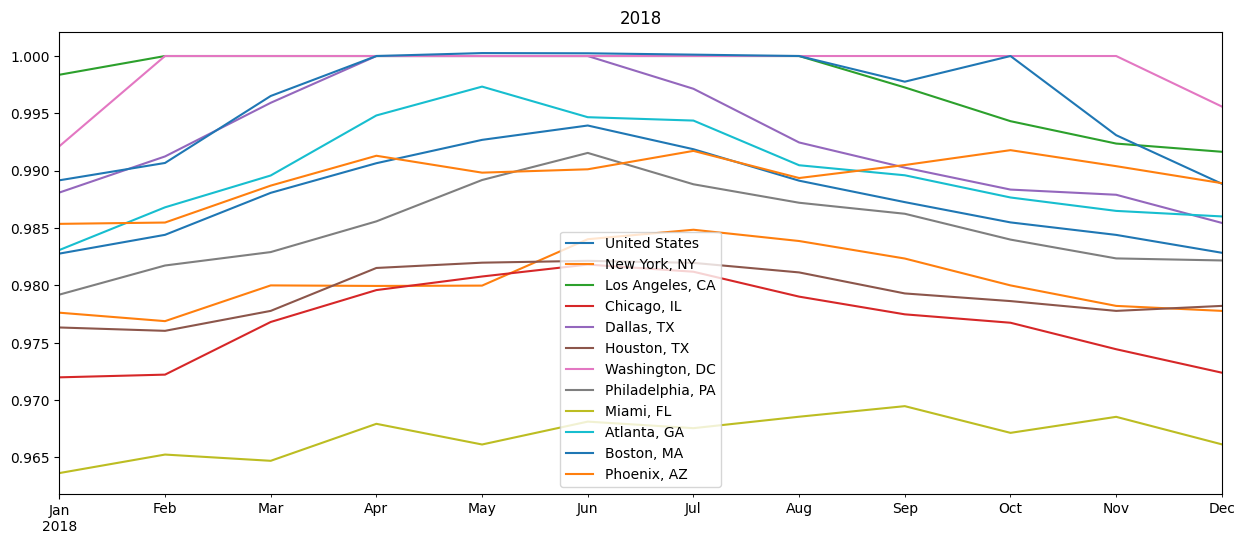

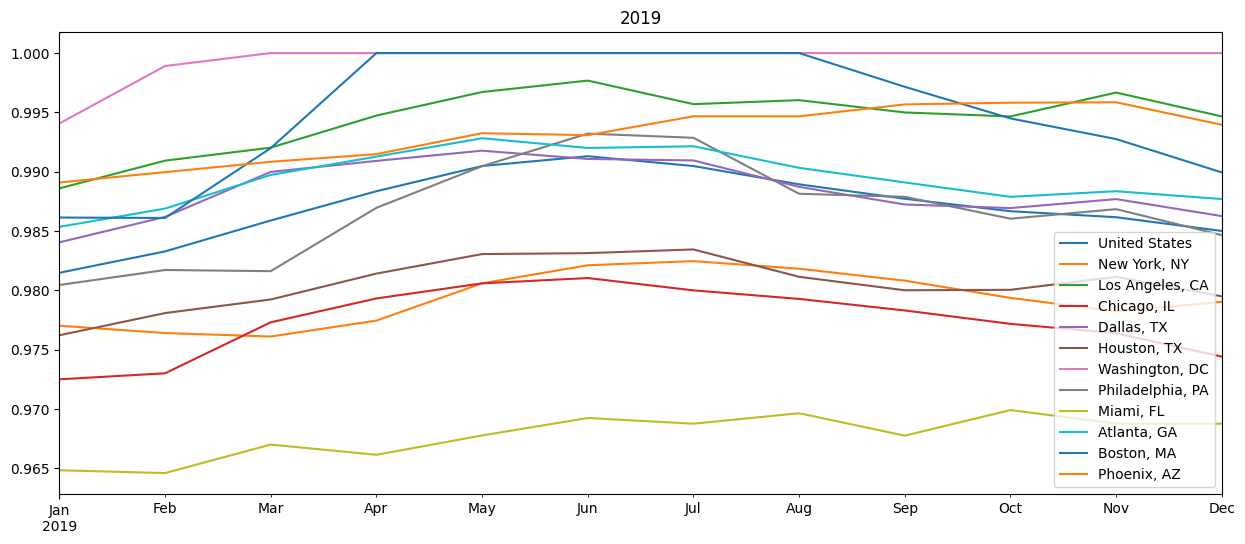

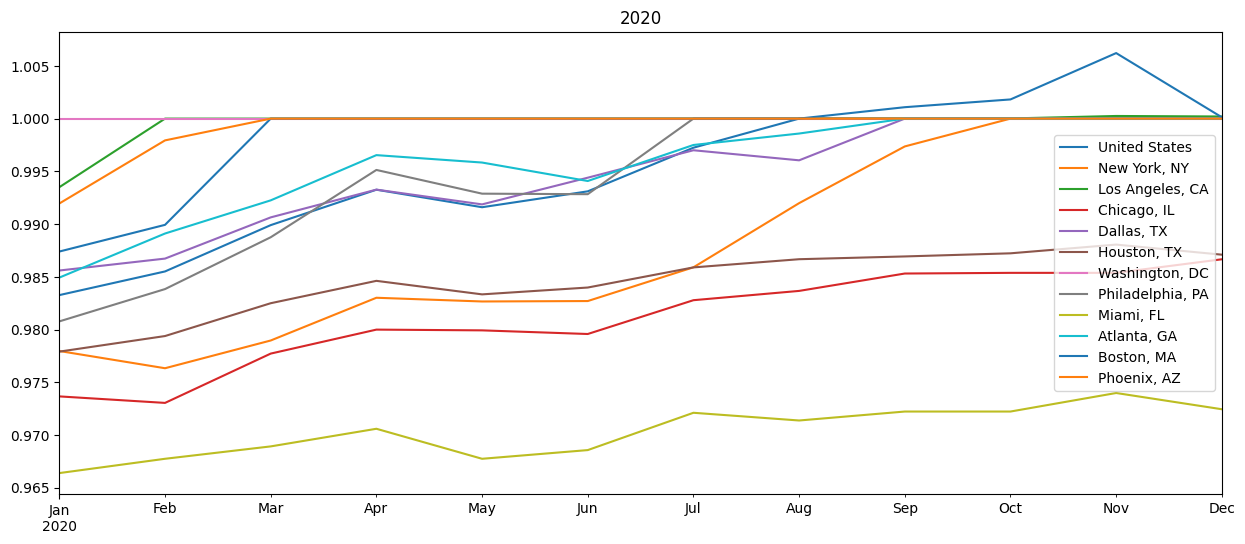

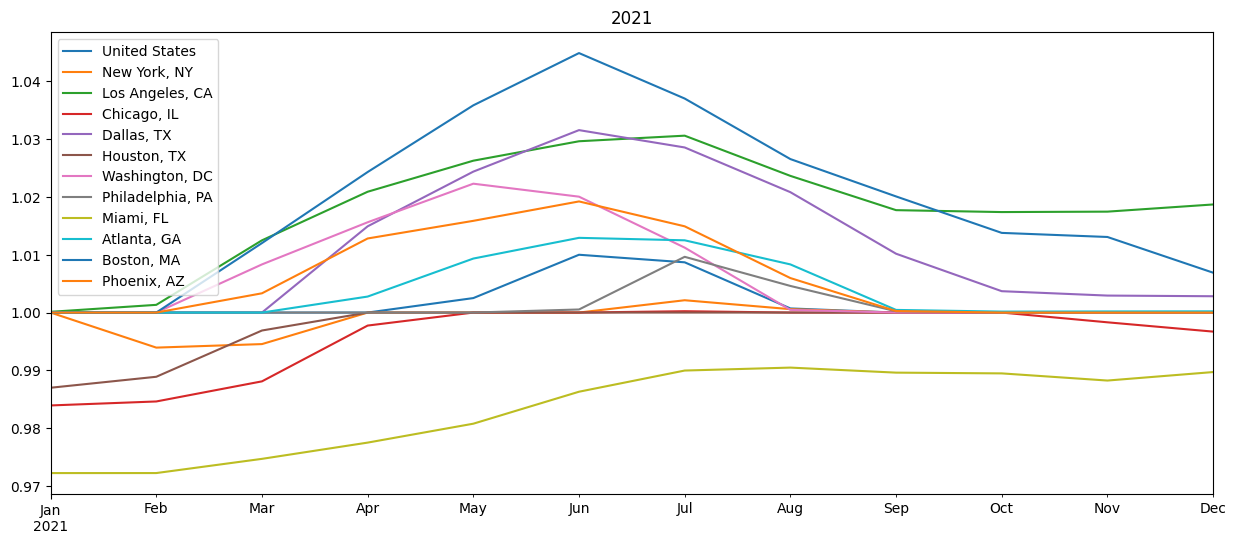

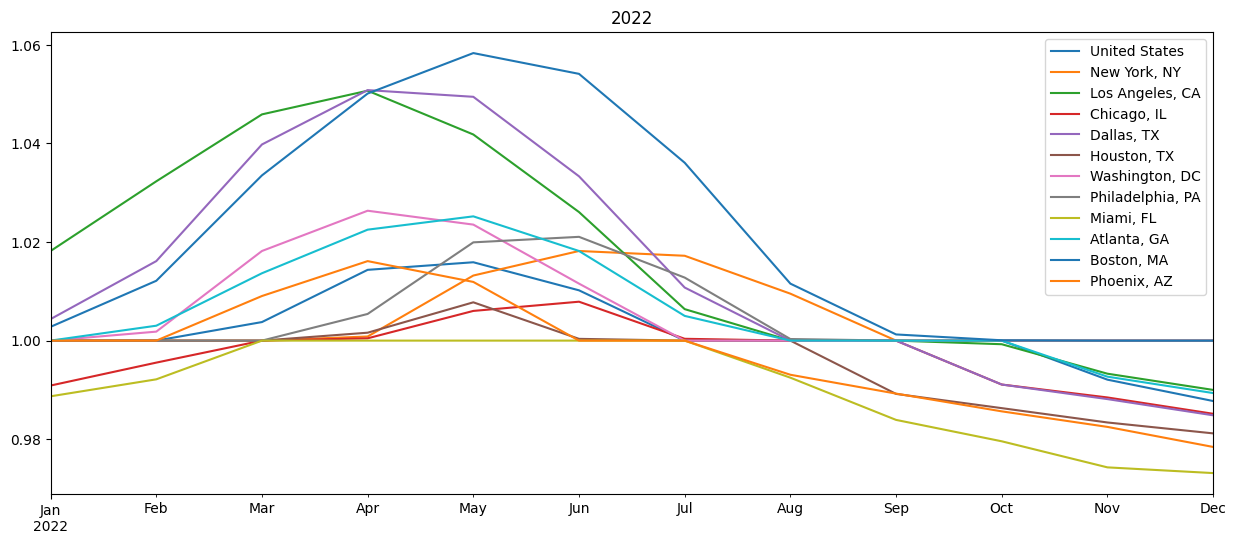

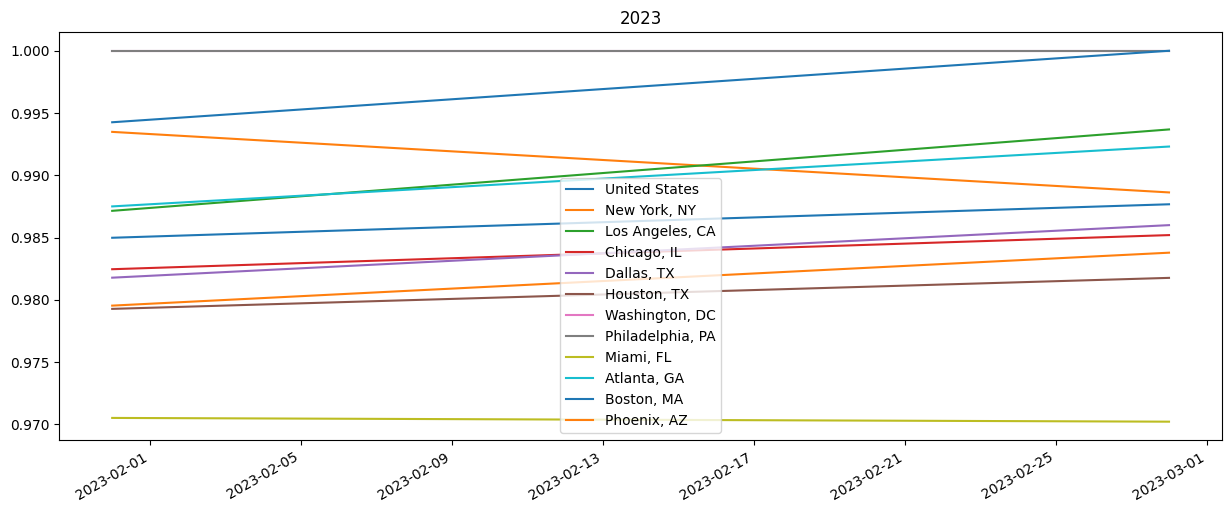

In [41]:
for key,value in dictrm.items():
    dictrm[key].plot(figsize=(15,6),title=key)

For the years 2018 and 2019, the trends and seasonal factors appear to be relatively consistent between the top 10 metropolitan regions in the United States. Washington D.C appears to have the highest sale-to-list price ratio and Miami appears to have the lowest. What's interesting is that the ratio at the beginning of the year almost always goes up during the summer months, but it begins to climb back down to its original starting position. In 2020, we pretty much only see a growth period for the sale-to-list price ratio showcasing the effects of the COVID-19 pandemic on the housing market. The ratio appeared to climb the entire year signaling that buyers were continuing to pay more over over asking price and sellers were getting more and more money on their homes. In 2021 similar trend where the ratio continues to increase, however it appears to be more seasonal with the ratio declining after the summer months. Miami still presenting the lowest sale-to-list price ratio for the top 10 metropolitan regions. It also appears that Los Angeles is now leading with the highest sale-to-list price ratio. In 2022 we finally begin to see the impact of rising interest rates on the housing market as the ratio hits a high during the late spring and early summer but sharply begins to decline towards the end of the year. It appears that Dallas most certainly had a larger impact in ratio rise and fall over some of the other metropolitan regions. Now in 2023, we can see that we don't quite yet have enough data to know where the ratio will trend this year, but we can see that Miami is once again demonstrating the lowest sale-to-list price ratio for the top regions.

Now, we'd like to investigate if the square footage of a home is impacting the sale-to-list price ratio. Does square footage seem to effect the ratio in anyway? Will a higher square footage home (and potentially greater value of the home itself) cause the ratio to go up or down compared to homes with less or greater square footage? Let's dive deeper.

In [42]:
df_hv1 = pd.read_csv('./home-values/Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_hv2 = pd.read_csv('./home-values/Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_hv3 = pd.read_csv('./home-values/Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_hv4 = pd.read_csv('./home-values/Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_hv5 = pd.read_csv('./home-values/Metro_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [43]:
dfhv1 = transdf(df_hv1,11)
dfhv1 = dfhv1[dfhv1.index>='2018-01-31']
dfhv2 = transdf(df_hv2,11)
dfhv2 = dfhv2[dfhv2.index>='2018-01-31']
dfhv3 = transdf(df_hv3,11)
dfhv3 = dfhv3[dfhv3.index>='2018-01-31']
dfhv4 = transdf(df_hv4,11)
dfhv4 = dfhv4[dfhv4.index>='2018-01-31']
dfhv5 = transdf(df_hv5,11)
dfhv5 = dfhv5[dfhv5.index>='2018-01-31']

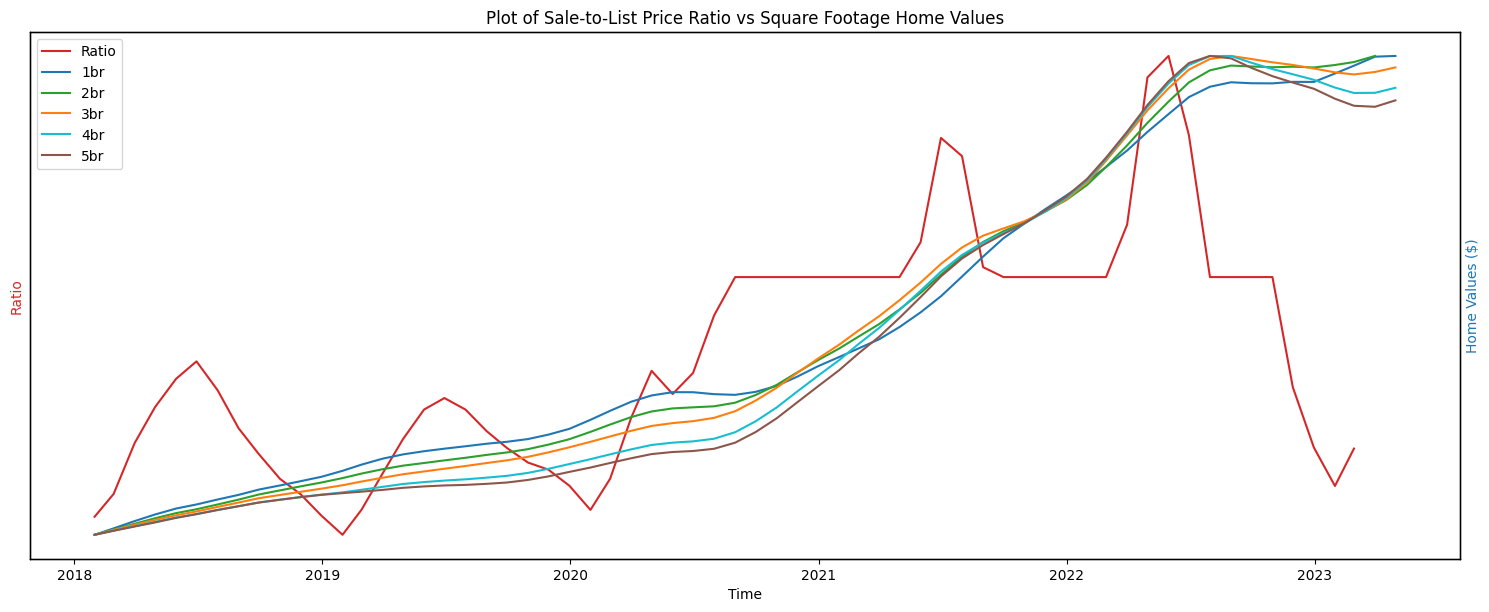

In [44]:
# Plotting Sale-to-List Price Ratio
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Ratio', color=color)
lns1 = ax1.plot(dfrm['United States'], color=color, label='Ratio')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks([])

# Plotting 1 Bedroom Home Values
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Home Values ($)', color=color)  # we already handled the x-label with ax1
lns2 = ax2.plot(dfhv1['United States'], color=color, label='1br')
ax2.set_yticks([])

# Plotting 2 Bedroom Home Values
ax3 = ax1.twinx()
color = 'tab:green'
lns3 = ax3.plot(dfhv2['United States'], color=color, label='2br')
ax3.set_yticks([])

# Plotting 3 Bedroom Home Values
ax4 = ax1.twinx()
color = 'tab:orange'
lns4 = ax4.plot(dfhv3['United States'], color=color, label='3br')
ax4.set_yticks([])

# Plotting 4 Bedroom Home Values
ax5 = ax1.twinx()
color = 'tab:cyan'
lns5 = ax5.plot(dfhv4['United States'], color=color, label='4br')
ax5.set_yticks([])

# Plotting 4 Bedroom Home Values
ax6 = ax1.twinx()
color = 'tab:brown'
lns6 = ax6.plot(dfhv5['United States'], color=color, label='5br')
ax6.set_yticks([])

leg = lns1 + lns2 + lns3 + lns4 + lns5 + lns6
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Plot of Sale-to-List Price Ratio vs Square Footage Home Values")
plt.show()

The figure above is showing the sale-to-list price ratio plotted alongside the home values for 1 through 5 bedroom homes aggregated accross the United States. We are making one key assumption that the number of bedrooms directly relates to the square footage of a home, meaning a house with 4 or 5 bedrooms will have a higher square footage than a house with 1, 2, or 3 bedrooms. We can see there very clearly exists a relationship between all of the number of bedrooms and their home value growth over time. It appears that since 2018, the home values for all single family homes across the United States have increased no matter the number of bedrooms (and no matter the square footage of the home). There does not appear to be any relationship bewteen the sale-to-list price ratio and the square footage home values. Therefore, we can answer the question that the square footage price (home value per number of bedrooms) is not directly impacting the sale and listing price ratio to go up or down. While the square footage home value for single family homes has been increasing, it does not appear to have been increasing as a result of the sale-to-list price ratio, nor does the sale-to-list price ratio appear to be impacted by the square footage home values.

## 5. How long some of the houses are on the market before they rent or sell?

In [45]:
#z-score
new_df_day_null =days_to_pending.drop('SizeRank', axis=1)
new_df_day_null =new_df_day_null.drop('RegionName', axis=1)
new_df_day_null =new_df_day_null.drop('RegionType', axis=1)
new_df_day_null =new_df_day_null.drop('StateName', axis=1)
new_df_day_null = new_df_day_null.set_index('RegionID')
display(new_df_day_null)

2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  \
RegionID                                                               
102001          47.0        25.0        20.0        18.0        18.0   
394913          86.0        51.0        37.0        41.0        37.0   
753899          21.0        14.0        15.0        14.0        15.0   
394463          57.0        23.0        15.0        14.0        15.0   
394514          37.0        24.0        21.0        19.0        20.0   
...              ...         ...         ...         ...         ...   
395003           NaN         NaN         NaN         NaN         NaN   
786263           NaN         NaN         NaN         NaN         NaN   
786257           NaN         NaN         NaN         NaN         NaN   
395112           NaN         NaN         NaN         NaN         NaN   
753880           NaN         NaN         NaN         NaN         NaN   

          2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  ...  \
RegionID                                                              ...   
102001          19.0        22.0        26.0        30.0        31.0  ...   
394913          43.0        49.0        53.0        58.0        55.0  ...   
753899          16.0        19.0        22.0        25.0        26.0  ...   
394463          18.0        21.0        25.0        30.0        34.0  ...   
394514          22.0        24.0        29.0        32.0        33.0  ...   
...              ...         ...         ...         ...         ...  ...   
395003           NaN         NaN         NaN         NaN         NaN  ...   
786263           NaN         NaN         NaN         NaN         NaN  ...   
786257           NaN         NaN         NaN         NaN         NaN  ...   
395112           NaN         NaN         NaN         NaN         NaN  ...   
753880           NaN         NaN         NaN         NaN         NaN  ...   

          2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  \
RegionID                                                               
102001           8.0        12.0        15.0        17.0        18.0   
394913          26.0        31.0        34.0        38.0        33.0   
753899          13.0        17.0        21.0        22.0        22.0   
394463           7.0        11.0        14.0        16.0        16.0   
394514           7.0        10.0        14.0        16.0        17.0   
...              ...         ...         ...         ...         ...   
395003           NaN         NaN         NaN         NaN         NaN   
786263           NaN         NaN         NaN         NaN         NaN   
786257           NaN         NaN         NaN         NaN         NaN   
395112           NaN         NaN         NaN         NaN         NaN   
753880           NaN         NaN         NaN         NaN         NaN   

          2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  
RegionID                                                              
102001          22.0        31.0        31.0        17.0        13.0  
394913          37.0        47.0        56.0        33.0        25.0  
753899          25.0        35.0        35.0        19.0        15.0  
394463          21.0        33.0        26.0        12.0         8.0  
394514          22.0        30.0        34.0        17.0        11.0  
...              ...         ...         ...         ...         ...  
395003           NaN         NaN         NaN         NaN        15.0  
786263           NaN         NaN         NaN         NaN        51.0  
786257           NaN         NaN         NaN        21.0        17.0  
395112           NaN         NaN         NaN         NaN        49.0  
753880           NaN         NaN         NaN         NaN        14.0  

[776 rows x 63 columns]

In [46]:
interpolated = new_df_day_null.interpolate(method='pad')
display(interpolated)

2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  \
RegionID                                                               
102001          47.0        25.0        20.0        18.0        18.0   
394913          86.0        51.0        37.0        41.0        37.0   
753899          21.0        14.0        15.0        14.0        15.0   
394463          57.0        23.0        15.0        14.0        15.0   
394514          37.0        24.0        21.0        19.0        20.0   
...              ...         ...         ...         ...         ...   
395003          25.0        18.0        10.0        11.0        10.0   
786263          25.0        18.0        10.0        11.0        10.0   
786257          25.0        18.0        10.0        11.0        10.0   
395112          25.0        18.0        10.0        11.0        10.0   
753880          25.0        18.0        10.0        11.0        10.0   

          2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  ...  \
RegionID                                                              ...   
102001          19.0        22.0        26.0        30.0        31.0  ...   
394913          43.0        49.0        53.0        58.0        55.0  ...   
753899          16.0        19.0        22.0        25.0        26.0  ...   
394463          18.0        21.0        25.0        30.0        34.0  ...   
394514          22.0        24.0        29.0        32.0        33.0  ...   
...              ...         ...         ...         ...         ...  ...   
395003          12.0        22.0        23.0        36.0        37.0  ...   
786263          12.0        22.0        23.0        36.0        37.0  ...   
786257          12.0        22.0        23.0        36.0        37.0  ...   
395112          12.0        22.0        23.0        36.0        37.0  ...   
753880          12.0        22.0        23.0        36.0        37.0  ...   

          2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  \
RegionID                                                               
102001           8.0        12.0        15.0        17.0        18.0   
394913          26.0        31.0        34.0        38.0        33.0   
753899          13.0        17.0        21.0        22.0        22.0   
394463           7.0        11.0        14.0        16.0        16.0   
394514           7.0        10.0        14.0        16.0        17.0   
...              ...         ...         ...         ...         ...   
395003           8.0        14.0        23.0        19.0        21.0   
786263           8.0        14.0        23.0        19.0        21.0   
786257           8.0        14.0        23.0        19.0        21.0   
395112           8.0        14.0        23.0        19.0        21.0   
753880           8.0        14.0        23.0        19.0        21.0   

          2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  
RegionID                                                              
102001          22.0        31.0        31.0        17.0        13.0  
394913          37.0        47.0        56.0        33.0        25.0  
753899          25.0        35.0        35.0        19.0        15.0  
394463          21.0        33.0        26.0        12.0         8.0  
394514          22.0        30.0        34.0        17.0        11.0  
...              ...         ...         ...         ...         ...  
395003          19.0        51.0        28.0        20.0        15.0  
786263          19.0        51.0        28.0        20.0        51.0  
786257          19.0        51.0        28.0        21.0        17.0  
395112          19.0        51.0        28.0        21.0        49.0  
753880          19.0        51.0        28.0        21.0        14.0  

[776 rows x 63 columns]

In [47]:
# Get the mean and std value for each city:
IRQ = interpolated.apply(pd.DataFrame.describe, axis=1)
IRQ['City']=IRQ.index.map(mapper=(lambda x: outlier_dict.get(x)))
display(IRQ)

count       mean        std   min   25%   50%   75%    max  \
RegionID                                                               
102001     63.0  19.571429  10.923066   6.0  11.5  18.0  25.5   48.0   
394913     63.0  44.222222  15.744374  22.0  32.0  42.0  55.0   86.0   
753899     63.0  17.984127   7.495143   9.0  12.0  15.0  22.0   41.0   
394463     63.0  21.031746  14.074649   6.0  12.5  17.0  24.5   61.0   
394514     63.0  23.396825  10.290208   5.0  16.0  22.0  29.5   48.0   
...         ...        ...        ...   ...   ...   ...   ...    ...   
395003     63.0  27.396825  25.231534   7.0  14.5  22.0  28.0  162.0   
786263     63.0  27.968254  25.353608   7.0  14.5  22.0  30.0  162.0   
786257     63.0  27.444444  25.212502   7.0  14.5  22.0  28.0  162.0   
395112     63.0  27.952381  25.320799   7.0  14.5  22.0  30.0  162.0   
753880     63.0  27.396825  25.235369   7.0  14.0  22.0  28.0  162.0   

                     City  
RegionID                   
102001      United States  
394913       New York, NY  
753899    Los Angeles, CA  
394463        Chicago, IL  
394514         Dallas, TX  
...                   ...  
395003          Price, UT  
786263        Ruidoso, NM  
786257       Fairmont, MN  
395112    Spirit Lake, IA  
753880      Fairfield, IA  

[776 rows x 9 columns]

In [48]:
# z-score: find outliers that's significantly higher/lower than the average of 
z_score = scipy.stats.zscore(interpolated, axis=1, ddof=0, nan_policy= 'propagate')
# Outliers at 15% significant level:
z_score['upper'] = scipy.stats.norm.ppf(1-0.075, loc=z_score.mean(axis=1),scale=z_score.std(axis=1)) 
z_score['lower'] = scipy.stats.norm.ppf(0.075, loc=z_score.mean(axis=1),scale=z_score.std(axis=1))
display(z_score)

2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  \
RegionID                                                               
102001      2.531239    0.500974    0.039551   -0.145019   -0.145019   
394913      2.674819    0.433947   -0.462402   -0.206303   -0.462402   
753899      0.405609   -0.535831   -0.401339   -0.535831   -0.401339   
394463      2.576061    0.140967   -0.431996   -0.503617   -0.431996   
394514      1.332572    0.059087   -0.234794   -0.430715   -0.332754   
...              ...         ...         ...         ...         ...   
395003     -0.095756   -0.375415   -0.695026   -0.655074   -0.695026   
786263     -0.118015   -0.396327   -0.714399   -0.674640   -0.714399   
786257     -0.097732   -0.377603   -0.697454   -0.657473   -0.697454   
395112     -0.117536   -0.396209   -0.714692   -0.674882   -0.714692   
753880     -0.095742   -0.375358   -0.694920   -0.654975   -0.694920   

          2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  ...  \
RegionID                                                              ...   
102001     -0.052734    0.224120    0.593259    0.962398    1.054683  ...   
394913     -0.078253    0.305897    0.561997    0.882121    0.690046  ...   
753899     -0.266848    0.136626    0.540100    0.943575    1.078066  ...   
394463     -0.217135   -0.002274    0.284208    0.642310    0.928792  ...   
394514     -0.136833    0.059087    0.548889    0.842770    0.940730  ...   
...              ...         ...         ...         ...         ...  ...   
395003     -0.615123   -0.215610   -0.175659    0.343708    0.383659  ...   
786263     -0.634881   -0.237291   -0.197532    0.319334    0.359093  ...   
786257     -0.617491   -0.217677   -0.177695    0.342063    0.382045  ...   
395112     -0.635071   -0.236967   -0.197156    0.320379    0.360190  ...   
753880     -0.615030   -0.215577   -0.175632    0.343656    0.383601  ...   

          2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
RegionID                                                               
102001     -0.421873   -0.237304   -0.145019    0.224120    1.054683   
394913     -0.654477   -0.398377   -0.718502   -0.462402    0.177847   
753899      0.405609    0.540100    0.540100    0.943575    2.288489   
394463     -0.503617   -0.360376   -0.360376   -0.002274    0.857171   
394514     -0.920516   -0.724596   -0.626635   -0.136833    0.646849   
...              ...         ...         ...         ...         ...   
395003     -0.175659   -0.335464   -0.255561   -0.335464    0.942977   
786263     -0.197532   -0.356568   -0.277050   -0.356568    0.915718   
786257     -0.177695   -0.337621   -0.257658   -0.337621    0.941785   
395112     -0.197156   -0.356398   -0.276777   -0.356398    0.917536   
753880     -0.175632   -0.335413   -0.255523   -0.335413    0.942834   

          2023-01-31  2023-02-28  2023-03-31     upper     lower  
RegionID                                                          
102001      1.054683   -0.237304   -0.606443  1.451094 -1.440348  
394913      0.754071   -0.718502   -1.230701  1.451094 -1.440348  
753899      2.288489    0.136626   -0.401339  1.451094 -1.440348  
394463      0.355828   -0.646857   -0.933339  1.451094 -1.440348  
394514      1.038691   -0.626635   -1.214397  1.451094 -1.440348  
...              ...         ...         ...       ...       ...  
395003      0.024098   -0.295513   -0.495269  1.451094 -1.440348  
786263      0.001262   -0.316809    0.915718  1.451094 -1.440348  
786257      0.022212   -0.257658   -0.417584  1.451094 -1.440348  
395112      0.001896   -0.276777    0.837915  1.451094 -1.440348  
753880      0.024094   -0.255523   -0.535139  1.451094 -1.440348  

[776 rows x 65 columns]

In [49]:
# from each rows, find values that => upper -> outliers that shows the longest day a house has to stay on market before become pending
# from each rows, find values that <= lower
upper_val = z_score['upper'].apply(lambda x:np.round(x,6)).drop_duplicates().reset_index(drop=True)[0]
lower_val = z_score['lower'].apply(lambda x:np.round(x,6)).drop_duplicates().reset_index(drop=True)[0]

In [50]:
# Find all outliers:
#outliers = [z_score[x][~z_score[x].between(lower_val, upper_val, inclusive='neither')] for x in z_score.columns]
#display(outliers)
# outlier values below lower
lower_outliers = [z_score[x][z_score[x]<=lower_val]for x in z_score.columns]
upper_outliers = [z_score[x][z_score[x]>=upper_val]for x in z_score.columns]

In [51]:
# OUTLIERS LOWER THAN lowver_val:
lower_outliers = [i for i in lower_outliers if i.empty==False]
df_lower_outliers = pd.DataFrame(lower_outliers)
df_lower_outliers = df_lower_outliers.T
display(df_lower_outliers)

2021-01-31  2021-02-28  2021-03-31  2021-04-30  2021-05-31  \
RegionID                                                               
753901     -1.535607         NaN         NaN         NaN         NaN   
394320     -1.538275         NaN         NaN         NaN         NaN   
395206     -1.498299         NaN         NaN         NaN         NaN   
394673     -1.512302         NaN         NaN         NaN         NaN   
395185     -1.530328         NaN         NaN         NaN         NaN   
394740     -1.546909         NaN         NaN         NaN         NaN   
753926     -1.577130         NaN         NaN         NaN         NaN   
394892     -1.529102         NaN         NaN         NaN         NaN   
395222           NaN   -1.483367   -1.550988   -1.618609         NaN   
394733           NaN   -1.521330         NaN         NaN         NaN   
394689           NaN   -1.456024         NaN         NaN   -1.456024   
394825           NaN   -1.450949         NaN         NaN         NaN   
395040           NaN   -1.512337         NaN         NaN         NaN   
394591           NaN   -1.450759         NaN         NaN         NaN   
394862           NaN         NaN   -1.447405   -1.546413   -1.546413   
394765           NaN         NaN   -1.526183   -1.447822         NaN   
394485           NaN         NaN   -1.485324         NaN         NaN   
394930           NaN         NaN   -1.451130         NaN         NaN   
395140           NaN         NaN   -1.530972   -1.586277   -1.586277   
753918           NaN         NaN   -1.563201         NaN         NaN   
394763           NaN         NaN         NaN   -1.452462   -1.547830   
395011           NaN         NaN         NaN   -1.505972   -1.505972   
395119           NaN         NaN         NaN   -1.446438         NaN   
394980           NaN         NaN         NaN   -1.725735   -1.725735   
394699           NaN         NaN         NaN   -1.499500         NaN   
753916           NaN         NaN         NaN   -1.528174         NaN   
395152           NaN         NaN         NaN         NaN   -1.441852   
395153           NaN         NaN         NaN         NaN   -1.550769   
394511           NaN         NaN         NaN         NaN   -1.599993   
394680           NaN         NaN         NaN         NaN         NaN   
394960           NaN         NaN         NaN         NaN         NaN   
394712           NaN         NaN         NaN         NaN         NaN   
394731           NaN         NaN         NaN         NaN         NaN   
394691           NaN         NaN         NaN         NaN         NaN   
394856           NaN         NaN         NaN         NaN         NaN   
394742           NaN         NaN         NaN         NaN         NaN   
394514           NaN         NaN         NaN         NaN         NaN   
394995           NaN         NaN         NaN         NaN         NaN   
395174           NaN         NaN         NaN         NaN         NaN   
394748           NaN         NaN         NaN         NaN         NaN   
394299           NaN         NaN         NaN         NaN         NaN   
395094           NaN         NaN         NaN         NaN         NaN   
394821           NaN         NaN         NaN         NaN         NaN   
394345           NaN         NaN         NaN         NaN         NaN   
395129           NaN         NaN         NaN         NaN         NaN   
394624           NaN         NaN         NaN         NaN         NaN   
394397           NaN         NaN         NaN         NaN         NaN   
394845           NaN         NaN         NaN         NaN         NaN   

          2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  ...  \
RegionID                                                              ...   
753901           NaN         NaN         NaN         NaN         NaN  ...   
394320           NaN         NaN         NaN         NaN         NaN  ...   
395206           NaN         NaN         NaN         NaN         NaN  ...   
394673           NaN    

In [52]:
df_lower_outliers=df_lower_outliers.dropna(how='all', axis = 0)
display(df_lower_outliers)

2021-01-31  2021-02-28  2021-03-31  2021-04-30  2021-05-31  \
RegionID                                                               
753901     -1.535607         NaN         NaN         NaN         NaN   
394320     -1.538275         NaN         NaN         NaN         NaN   
395206     -1.498299         NaN         NaN         NaN         NaN   
394673     -1.512302         NaN         NaN         NaN         NaN   
395185     -1.530328         NaN         NaN         NaN         NaN   
394740     -1.546909         NaN         NaN         NaN         NaN   
753926     -1.577130         NaN         NaN         NaN         NaN   
394892     -1.529102         NaN         NaN         NaN         NaN   
395222           NaN   -1.483367   -1.550988   -1.618609         NaN   
394733           NaN   -1.521330         NaN         NaN         NaN   
394689           NaN   -1.456024         NaN         NaN   -1.456024   
394825           NaN   -1.450949         NaN         NaN         NaN   
395040           NaN   -1.512337         NaN         NaN         NaN   
394591           NaN   -1.450759         NaN         NaN         NaN   
394862           NaN         NaN   -1.447405   -1.546413   -1.546413   
394765           NaN         NaN   -1.526183   -1.447822         NaN   
394485           NaN         NaN   -1.485324         NaN         NaN   
394930           NaN         NaN   -1.451130         NaN         NaN   
395140           NaN         NaN   -1.530972   -1.586277   -1.586277   
753918           NaN         NaN   -1.563201         NaN         NaN   
394763           NaN         NaN         NaN   -1.452462   -1.547830   
395011           NaN         NaN         NaN   -1.505972   -1.505972   
395119           NaN         NaN         NaN   -1.446438         NaN   
394980           NaN         NaN         NaN   -1.725735   -1.725735   
394699           NaN         NaN         NaN   -1.499500         NaN   
753916           NaN         NaN         NaN   -1.528174         NaN   
395152           NaN         NaN         NaN         NaN   -1.441852   
395153           NaN         NaN         NaN         NaN   -1.550769   
394511           NaN         NaN         NaN         NaN   -1.599993   
394680           NaN         NaN         NaN         NaN         NaN   
394960           NaN         NaN         NaN         NaN         NaN   
394712           NaN         NaN         NaN         NaN         NaN   
394731           NaN         NaN         NaN         NaN         NaN   
394691           NaN         NaN         NaN         NaN         NaN   
394856           NaN         NaN         NaN         NaN         NaN   
394742           NaN         NaN         NaN         NaN         NaN   
394514           NaN         NaN         NaN         NaN         NaN   
394995           NaN         NaN         NaN         NaN         NaN   
395174           NaN         NaN         NaN         NaN         NaN   
394748           NaN         NaN         NaN         NaN         NaN   
394299           NaN         NaN         NaN         NaN         NaN   
395094           NaN         NaN         NaN         NaN         NaN   
394821           NaN         NaN         NaN         NaN         NaN   
394345           NaN         NaN         NaN         NaN         NaN   
395129           NaN         NaN         NaN         NaN         NaN   
394624           NaN         NaN         NaN         NaN         NaN   
394397           NaN         NaN         NaN         NaN         NaN   
394845           NaN         NaN         NaN         NaN         NaN   

          2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  ...  \
RegionID                                                              ...   
753901           NaN         NaN         NaN         NaN         NaN  ...   
394320           NaN         NaN         NaN         NaN         NaN  ...   
395206           NaN         NaN         NaN         NaN         NaN  ...   
394673           NaN    

In [53]:
df_lower_outliers['RegionName']=df_lower_outliers.index.map(mapper=(lambda x: outlier_dict.get(x)))
df_lower_outliers['StateName']=df_lower_outliers.index.map(mapper=(lambda x: outlier_state.get(x)))
display(df_lower_outliers)

2021-01-31  2021-02-28  2021-03-31  2021-04-30  2021-05-31  \
RegionID                                                               
753901     -1.535607         NaN         NaN         NaN         NaN   
394320     -1.538275         NaN         NaN         NaN         NaN   
395206     -1.498299         NaN         NaN         NaN         NaN   
394673     -1.512302         NaN         NaN         NaN         NaN   
395185     -1.530328         NaN         NaN         NaN         NaN   
394740     -1.546909         NaN         NaN         NaN         NaN   
753926     -1.577130         NaN         NaN         NaN         NaN   
394892     -1.529102         NaN         NaN         NaN         NaN   
395222           NaN   -1.483367   -1.550988   -1.618609         NaN   
394733           NaN   -1.521330         NaN         NaN         NaN   
394689           NaN   -1.456024         NaN         NaN   -1.456024   
394825           NaN   -1.450949         NaN         NaN         NaN   
395040           NaN   -1.512337         NaN         NaN         NaN   
394591           NaN   -1.450759         NaN         NaN         NaN   
394862           NaN         NaN   -1.447405   -1.546413   -1.546413   
394765           NaN         NaN   -1.526183   -1.447822         NaN   
394485           NaN         NaN   -1.485324         NaN         NaN   
394930           NaN         NaN   -1.451130         NaN         NaN   
395140           NaN         NaN   -1.530972   -1.586277   -1.586277   
753918           NaN         NaN   -1.563201         NaN         NaN   
394763           NaN         NaN         NaN   -1.452462   -1.547830   
395011           NaN         NaN         NaN   -1.505972   -1.505972   
395119           NaN         NaN         NaN   -1.446438         NaN   
394980           NaN         NaN         NaN   -1.725735   -1.725735   
394699           NaN         NaN         NaN   -1.499500         NaN   
753916           NaN         NaN         NaN   -1.528174         NaN   
395152           NaN         NaN         NaN         NaN   -1.441852   
395153           NaN         NaN         NaN         NaN   -1.550769   
394511           NaN         NaN         NaN         NaN   -1.599993   
394680           NaN         NaN         NaN         NaN         NaN   
394960           NaN         NaN         NaN         NaN         NaN   
394712           NaN         NaN         NaN         NaN         NaN   
394731           NaN         NaN         NaN         NaN         NaN   
394691           NaN         NaN         NaN         NaN         NaN   
394856           NaN         NaN         NaN         NaN         NaN   
394742           NaN         NaN         NaN         NaN         NaN   
394514           NaN         NaN         NaN         NaN         NaN   
394995           NaN         NaN         NaN         NaN         NaN   
395174           NaN         NaN         NaN         NaN         NaN   
394748           NaN         NaN         NaN         NaN         NaN   
394299           NaN         NaN         NaN         NaN         NaN   
395094           NaN         NaN         NaN         NaN         NaN   
394821           NaN         NaN         NaN         NaN         NaN   
394345           NaN         NaN         NaN         NaN         NaN   
395129           NaN         NaN         NaN         NaN         NaN   
394624           NaN         NaN         NaN         NaN         NaN   
394397           NaN         NaN         NaN         NaN         NaN   
394845           NaN         NaN         NaN         NaN         NaN   

          2021-06-30  2021-07-31  2021-08-31  2021-09-30  2021-10-31  ...  \
RegionID                                                              ...   
753901           NaN         NaN         NaN         NaN         NaN  ...   
394320           NaN         NaN         NaN         NaN         NaN  ...   
395206           NaN         NaN         NaN         NaN         NaN  ...   
394673           NaN    

In [54]:
display(df_lower_outliers.groupby(['StateName'])['RegionName'].count())

StateName
AL     1
AR     3
AZ     1
FL     4
HI     2
ID     2
KS     2
LA     2
MI     2
MN     1
MO     2
MT     1
NM     1
NY     1
OH     2
OK     1
PA     1
TN     2
TX    11
UT     1
WI     5
Name: RegionName, dtype: int64

- Applying a significance level of 15% to identify outliers, we find that the states of Texas, Wisconsin, Florida, and Arkansas have the highest number of cities exhibiting the lowest number of days pending on the market.

- The selection of a 15% significance level is justified as it allows for a reasonable range of cities to be classified as having the lowest number of days pending on the market.

In [55]:
lower_state_city = df_lower_outliers.groupby(['StateName'])['RegionName'].sum()
lower_state_city_dict = lower_state_city.to_dict()
display(lower_state_city_dict)

{'AL': 'Cullman, AL',
 'AR': 'Hot Springs, ARPine Bluff, ARBlytheville, AR',
 'AZ': 'Lake Havasu City, AZ',
 'FL': 'The Villages, FLPanama City, FLMiami, FLPort St. Lucie, FL',
 'HI': 'Hilo, HIKahului, HI',
 'ID': 'Mountain Home, IDSandpoint, ID',
 'KS': 'Hays, KSManhattan, KS',
 'LA': 'Lake Charles, LAHouma, LA',
 'MI': 'Ludington, MIAlpena, MI',
 'MN': 'Fergus Falls, MN',
 'MO': 'Kennett, MOColumbia, MO',
 'MT': 'Kalispell, MT',
 'NM': 'Roswell, NM',
 'NY': 'Kingston, NY',
 'OH': 'Washington Court House, OHVan Wert, OH',
 'OK': 'Weatherford, OK',
 'PA': 'Sunbury, PA',
 'TN': 'Jackson, TNMcMinnville, TN',
 'TX': 'Odessa, TXHuntsville, TXTexarkana, TXKerrville, TXDallas, TXTyler, TXAbilene, TXSherman, TXAthens, TXStephenville, TXGainesville, TX',
 'UT': 'St. George, UT',
 'WI': 'Whitewater, WIMarinette, WIMilwaukee, WIShawano, WIRacine, WI'}

In [56]:
# Look at TX:
df_lower_outliers_TX = df_lower_outliers[df_lower_outliers['StateName']=='TX']
df_lower_outliers_TX=df_lower_outliers_TX.dropna(how='all', axis = 1)
display(df_lower_outliers_TX)

2021-03-31  2021-04-30  2021-05-31  2021-06-30  2022-02-28  \
RegionID                                                               
394930      -1.45113         NaN         NaN         NaN         NaN   
394699           NaN     -1.4995         NaN     -1.4995         NaN   
395152           NaN         NaN   -1.441852         NaN         NaN   
394742           NaN         NaN         NaN         NaN   -1.550011   
394514           NaN         NaN         NaN         NaN         NaN   
395174           NaN         NaN         NaN         NaN         NaN   
394299           NaN         NaN         NaN         NaN         NaN   
395094           NaN         NaN         NaN         NaN         NaN   
394345           NaN         NaN         NaN         NaN         NaN   
395129           NaN         NaN         NaN         NaN         NaN   
394624           NaN         NaN         NaN         NaN         NaN   

          2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
RegionID                                                               
394930           NaN         NaN         NaN         NaN         NaN   
394699           NaN         NaN         NaN         NaN         NaN   
395152           NaN         NaN         NaN         NaN         NaN   
394742           NaN         NaN         NaN         NaN         NaN   
394514     -1.704199   -1.802159   -1.802159   -1.606239         NaN   
395174     -1.696438   -1.783542   -1.609335         NaN         NaN   
394299     -1.532054   -1.835574   -1.759694   -1.683814   -1.607934   
395094           NaN   -1.566785   -1.503994   -1.503994         NaN   
394345           NaN   -1.604345   -1.549829         NaN         NaN   
395129           NaN   -1.496592         NaN   -1.496592         NaN   
394624           NaN   -1.658333   -1.603347   -1.493373   -1.493373   

          2022-08-31        RegionName StateName  
RegionID                                          
394930           NaN        Odessa, TX        TX  
394699           NaN    Huntsville, TX        TX  
395152           NaN     Texarkana, TX        TX  
394742           NaN     Kerrville, TX        TX  
394514           NaN        Dallas, TX        TX  
395174           NaN         Tyler, TX        TX  
394299     -1.532054       Abilene, TX        TX  
395094           NaN       Sherman, TX        TX  
394345           NaN        Athens, TX        TX  
395129           NaN  Stephenville, TX        TX  
394624           NaN   Gainesville, TX        TX

- From the z-score analysis for TX, Texarkana city has the highest z-score, which indicates that this city is the lowest outlier value for days to pending.

###### In conclusion:
- The analysis of the days to pending data reveals its susceptibility to both seasonal variations and unexpected factors, such as the COVID-19 pandemic.

- By examining the z-score data within a 15% significant interval, it becomes evident that the states of Texas, Wisconsin, Florida, and Arkansas have the highest concentration of cities with the lowest days to pending on the market.

- Specifically, within Texas:
    - There are 11 cities that fall into this category. 
    - Texarkana stands out as having a z-score value 1.44 units below the average, indicating the longest (shortest distance from the average) days to pending value among the cities examined.
    - Dallas, being a prominent city, exhibits the shortest days to pending values between late March to late June 2022.
    - However, it is worth noting that Abilene surpasses all other cities in terms of having the shortest days to pending values.


## 6. How much average profit I could expect from my investments in terms of rent after paying mortgage?

In [57]:
df_med_sale_price = pd.read_csv('./list-sale-prices/Metro_median_sale_price_uc_sfrcondo_sm_month.csv')
df_med_sale_price.head()

RegionID  SizeRank       RegionName RegionType StateName  2008-04-30  \
0    102001         0    United States    country       NaN    183333.0   
1    394913         1     New York, NY        msa        NY    400862.0   
2    753899         2  Los Angeles, CA        msa        CA    500500.0   
3    394463         3      Chicago, IL        msa        IL    239108.0   
4    394514         4       Dallas, TX        msa        TX    141633.0   

   2008-05-31  2008-06-30  2008-07-31  2008-08-31  ...  2022-05-31  \
0    185667.0    188333.0    190667.0    191333.0  ...    356667.0   
1    399334.0    401334.0    407333.0    414000.0  ...    531332.0   
2    495500.0    491000.0    481000.0    467667.0  ...    913167.0   
3    239608.0    243667.0    248333.0    252000.0  ...    295167.0   
4    144591.0    148175.0    151995.0    153370.0  ...    409000.0   

   2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  \
0    363333.0    361048.0    354714.0    346381.0    340333.0    334333.0   
1    546332.0    558332.0    570000.0    566667.0    551667.0    535000.0   
2    914833.0    898500.0    881333.0    864667.0    854167.0    842500.0   
3    306833.0    310167.0    308333.0    298333.0    288333.0    281333.0   
4    421667.0    420000.0    411667.0    399333.0    391000.0    382633.0   

   2022-12-31  2023-01-31  2023-02-28  
0    328667.0    323395.0    324028.0  
1    523333.0    520000.0    516667.0  
2    829167.0    819333.0    816667.0  
3    278000.0    274333.0    272667.0  
4    374531.0    362918.0    362768.0  

[5 rows x 184 columns]

In [58]:
dfmsp = transdf(df_med_sale_price,11) # Looking at top 10 largest metros plus US
dfmsp = dfmsp[dfmsp.index>='2015-03-31']
dfmsp

United States New York, NY Los Angeles, CA Chicago, IL Dallas, TX  \
2015-03-31      189667.0     361850.0        500000.0    189333.0   185467.0   
2015-04-30      194333.0     358667.0        510833.0    198333.0   192833.0   
2015-05-31      201000.0     361667.0        517667.0    211333.0   202167.0   
2015-06-30      207572.0     371667.0        524333.0    220667.0   209000.0   
2015-07-31      211572.0     381667.0        526333.0    225000.0   212333.0   
...                  ...          ...             ...         ...        ...   
2022-10-31      340333.0     551667.0        854167.0    288333.0   391000.0   
2022-11-30      334333.0     535000.0        842500.0    281333.0   382633.0   
2022-12-31      328667.0     523333.0        829167.0    278000.0   374531.0   
2023-01-31      323395.0     520000.0        819333.0    274333.0   362918.0   
2023-02-28      324028.0     516667.0        816667.0    272667.0   362768.0   

           Houston, TX Washington, DC Philadelphia, PA Miami, FL Atlanta, GA  \
2015-03-31    183667.0       352500.0         197083.0  215000.0    175900.0   
2015-04-30    187667.0       364167.0         199167.0  218667.0    183567.0   
2015-05-31    195333.0       377500.0         208500.0  225000.0    193567.0   
2015-06-30    201333.0       383333.0         218833.0  233000.0    199792.0   
2015-07-31    205667.0       385000.0         226333.0  239000.0    203208.0   
...                ...            ...              ...       ...         ...   
2022-10-31    322283.0       488300.0         324167.0  414750.0    365492.0   
2022-11-30    315950.0       481300.0         317500.0  413083.0    357192.0   
2022-12-31    309950.0       474667.0         314167.0  413083.0    352225.0   
2023-01-31    305633.0       460300.0         309167.0  410000.0    344583.0   
2023-02-28    305633.0       458967.0         304100.0  415000.0    343150.0   

           Boston, MA Phoenix, AZ  
2015-03-31   342583.0    201333.0  
2015-04-30   343917.0    203667.0  
2015-05-31   358167.0    208667.0  
2015-06-30   376333.0    212000.0  
2015-07-31   388667.0    214967.0  
...               ...         ...  
2022-10-31   607779.0    452728.0  
2022-11-30   597150.0    443062.0  
2022-12-31   586650.0    432662.0  
2023-01-31   577125.0    422750.0  
2023-02-28   560458.0    420083.0  

[96 rows x 12 columns]

In [59]:
df_rentals_metro = pd.read_csv('./rentals/Metro_zori_sm_month.csv')
df_rentals_metro.head()

RegionID  SizeRank       RegionName RegionType StateName   2015-03-31  \
0    102001         0    United States    country       NaN  1310.238936   
1    394913         1     New York, NY        msa        NY  2417.698919   
2    753899         2  Los Angeles, CA        msa        CA  1915.992729   
3    394463         3      Chicago, IL        msa        IL  1454.144423   
4    394514         4       Dallas, TX        msa        TX  1150.496999   

    2015-04-30   2015-05-31   2015-06-30   2015-07-31  ...   2022-06-30  \
0  1320.359331  1330.214894  1340.372546  1346.542472  ...  1955.957391   
1  2436.685580  2454.339972  2472.571177  2481.697026  ...  3121.052301   
2  1929.206693  1942.787480  1953.989284  1969.998997  ...  2884.584224   
3  1467.103087  1478.581567  1502.697671  1509.288876  ...  1879.076819   
4  1161.017134  1172.832034  1180.720187  1186.862211  ...  1790.557946   

    2022-07-31   2022-08-31   2022-09-30   2022-10-31   2022-11-30  \
0  1977.673623  1991.825628  1997.267710  1995.173026  1986.815710   
1  3176.308431  3200.920578  3198.198220  3174.823315  3142.258581   
2  2907.066842  2921.126637  2928.604706  2924.248255  2915.785281   
3  1899.158341  1908.013965  1910.899731  1909.183850  1902.847749   
4  1815.962542  1826.824947  1826.411373  1814.007954  1799.239643   

    2022-12-31   2023-01-31   2023-02-28   2023-03-31  
0  1981.599359  1980.427430  1986.354094  1995.541225  
1  3118.808863  3111.038913  3126.560256  3155.522826  
2  2907.638088  2902.234557  2905.664968  2914.971108  
3  1903.579357  1907.216081  1921.945677  1935.634060  
4  1783.775895  1778.233390  1780.782326  1788.991727  

[5 rows x 102 columns]

In [60]:
dfrentm = transdf(df_rentals_metro,11) # Looking at top 10 largest metros plus US
dfrentm = dfrentm[dfrentm.index<='2023-02-28']
dfrentm

United States New York, NY Los Angeles, CA  Chicago, IL  \
2015-03-31   1310.238936  2417.698919     1915.992729  1454.144423   
2015-04-30   1320.359331   2436.68558     1929.206693  1467.103087   
2015-05-31   1330.214894  2454.339972      1942.78748  1478.581567   
2015-06-30   1340.372546  2472.571177     1953.989284  1502.697671   
2015-07-31   1346.542472  2481.697026     1969.998997  1509.288876   
...                  ...          ...             ...          ...   
2022-10-31   1995.173026  3174.823315     2924.248255   1909.18385   
2022-11-30    1986.81571  3142.258581     2915.785281  1902.847749   
2022-12-31   1981.599359  3118.808863     2907.638088  1903.579357   
2023-01-31    1980.42743  3111.038913     2902.234557  1907.216081   
2023-02-28   1986.354094  3126.560256     2905.664968  1921.945677   

             Dallas, TX  Houston, TX Washington, DC Philadelphia, PA  \
2015-03-31  1150.496999  1277.431682    1775.362531      1329.426992   
2015-04-30  1161.017134  1285.442397    1785.118524      1335.765691   
2015-05-31  1172.832034  1294.913988    1792.317523      1345.314569   
2015-06-30  1180.720187  1303.989641    1801.463106       1350.92831   
2015-07-31  1186.862211  1308.969124    1805.122637      1354.747758   
...                 ...          ...            ...              ...   
2022-10-31  1814.007954  1645.775969    2237.940192      1828.043785   
2022-11-30  1799.239643  1637.432463    2218.984537      1821.818367   
2022-12-31  1783.775895  1632.019592    2201.614191      1817.942882   
2023-01-31   1778.23339  1637.439783    2197.455665      1817.233636   
2023-02-28  1780.782326  1645.292638    2207.157081      1818.486826   

              Miami, FL  Atlanta, GA   Boston, MA  Phoenix, AZ  
2015-03-31  1588.681024  1089.087358  2192.993918   994.704019  
2015-04-30   1594.63984  1097.946349  2211.606583  1007.564776  
2015-05-31  1601.293386  1108.239454  2230.802014  1011.443772  
2015-06-30  1611.335973  1118.640123  2248.377649  1020.446315  
2015-07-31  1619.333616  1127.805969  2257.236744  1022.218141  
...                 ...          ...          ...          ...  
2022-10-31  2767.687624  1965.550517  2964.671488  1904.816732  
2022-11-30   2779.83496  1955.153188   2960.00938  1892.039081  
2022-12-31  2778.369915  1948.979556  2940.178877  1881.060677  
2023-01-31  2776.267558  1944.196338  2933.603608  1874.364243  
2023-02-28  2774.344084  1949.812745  2942.980512  1878.185018  

[96 rows x 12 columns]

Above we have prepared 2 Pandas DataFrames. One contains the median sale price at which homes across various metopolitan regions and the United States were sold at. The other contains the typical observed market rate rent across various metropolitan regions and the United States. Since this report is being developed for a real estate investor with 7.5 Million Dollars in cash, we are making the assumption that the investor will not be taking any loans out on properties for purchase, and instead the homes will be bought in cash. Therefore, to make our math more straightforward, we will divide the sale price for all the homes by 360 which is 360 months representing the typical 30 year mortgage to obtain a value that might indicate the monthly mortgage cost a typical homeowner would be paying. We can then use that figure to directly compare against the rental values for homes across the United States.

In [61]:
dfmsp_monthly = dfmsp/(12*30)
dfmsp_monthly

United States New York, NY Los Angeles, CA Chicago, IL  \
2015-03-31    526.852778  1005.138889     1388.888889     525.925   
2015-04-30    539.813889   996.297222     1418.980556     550.925   
2015-05-31    558.333333  1004.630556     1437.963889  587.036111   
2015-06-30    576.588889  1032.408333     1456.480556  612.963889   
2015-07-31         587.7  1060.186111     1462.036111       625.0   
...                  ...          ...             ...         ...   
2022-10-31    945.369444  1532.408333     2372.686111     800.925   
2022-11-30    928.702778  1486.111111     2340.277778  781.480556   
2022-12-31    912.963889  1453.702778     2303.241667  772.222222   
2023-01-31    898.319444  1444.444444        2275.925  762.036111   
2023-02-28    900.077778  1435.186111     2268.519444  757.408333   

             Dallas, TX Houston, TX Washington, DC Philadelphia, PA  \
2015-03-31   515.186111  510.186111     979.166667       547.452778   
2015-04-30   535.647222  521.297222       1011.575       553.241667   
2015-05-31      561.575  542.591667    1048.611111       579.166667   
2015-06-30   580.555556  559.258333    1064.813889       607.869444   
2015-07-31   589.813889  571.297222    1069.444444       628.702778   
...                 ...         ...            ...              ...   
2022-10-31  1086.111111  895.230556    1356.388889       900.463889   
2022-11-30  1062.869444  877.638889    1336.944444       881.944444   
2022-12-31  1040.363889  860.972222    1318.519444       872.686111   
2023-01-31  1008.105556  848.980556    1278.611111       858.797222   
2023-02-28  1007.688889  848.980556    1274.908333       844.722222   

              Miami, FL  Atlanta, GA   Boston, MA  Phoenix, AZ  
2015-03-31   597.222222   488.611111   951.619444   559.258333  
2015-04-30   607.408333   509.908333      955.325   565.741667  
2015-05-31        625.0   537.686111   994.908333   579.630556  
2015-06-30   647.222222   554.977778  1045.369444   588.888889  
2015-07-31   663.888889   564.466667  1079.630556   597.130556  
...                 ...          ...          ...          ...  
2022-10-31  1152.083333  1015.255556     1688.275  1257.577778  
2022-11-30  1147.452778        992.2      1658.75  1230.727778  
2022-12-31  1147.452778   978.402778  1629.583333  1201.838889  
2023-01-31  1138.888889      957.175     1603.125  1174.305556  
2023-02-28  1152.777778   953.194444  1556.827778  1166.897222  

[96 rows x 12 columns]

In [62]:
df_delta = dfrentm - dfmsp_monthly
df_delta = df_delta.ffill()
df_delta

United States  New York, NY  Los Angeles, CA  Chicago, IL  \
2015-03-31     783.386158   1412.560030       527.103840   928.219423   
2015-04-30     780.545443   1440.388358       510.226138   916.178087   
2015-05-31     771.881561   1449.709417       504.823591   891.545456   
2015-06-30     763.783657   1440.162843       497.508728   889.733782   
2015-07-31     758.842472   1421.510915       507.962886   884.288876   
...                   ...           ...              ...          ...   
2022-10-31    1049.803582   1642.414981       551.562143  1108.258850   
2022-11-30    1058.112932   1656.147470       575.507503  1121.367193   
2022-12-31    1068.635470   1665.106085       604.396422  1131.357134   
2023-01-31    1082.107986   1666.594469       626.309557  1145.179970   
2023-02-28    1086.276317   1691.374145       637.145524  1164.537344   

            Dallas, TX  Houston, TX  Washington, DC  Philadelphia, PA  \
2015-03-31  635.310888   767.245571      796.195865        781.974215   
2015-04-30  625.369912   764.145174      773.543524        782.524025   
2015-05-31  611.257034   752.322322      743.706412        766.147903   
2015-06-30  600.164631   744.731308      736.649217        743.058865   
2015-07-31  597.048322   737.671902      735.678193        726.044981   
...                ...          ...             ...               ...   
2022-10-31  727.896843   750.545414      881.551303        927.579896   
2022-11-30  736.370198   759.793574      882.040092        939.873922   
2022-12-31  743.412006   771.047370      883.094746        945.256771   
2023-01-31  770.127835   788.459228      918.844554        958.436414   
2023-02-28  773.093437   796.312082      932.248748        973.764603   

              Miami, FL  Atlanta, GA   Boston, MA  Phoenix, AZ  
2015-03-31   991.458802   600.476247  1241.374473   435.445686  
2015-04-30   987.231507   588.038016  1256.281583   441.823109  
2015-05-31   976.293386   570.553343  1235.893681   431.813216  
2015-06-30   964.113751   563.662346  1203.008205   431.557426  
2015-07-31   955.444727   563.339302  1177.606189   425.087586  
...                 ...          ...          ...          ...  
2022-10-31  1615.604291   950.294961  1276.396488   647.238954  
2022-11-30  1632.382182   962.953188  1301.259380   661.311303  
2022-12-31  1630.917137   970.576778  1310.595544   679.221788  
2023-01-31  1637.378669   987.021338  1330.478608   700.058687  
2023-02-28  1621.566307   996.618301  1386.152734   711.287796  

[96 rows x 12 columns]

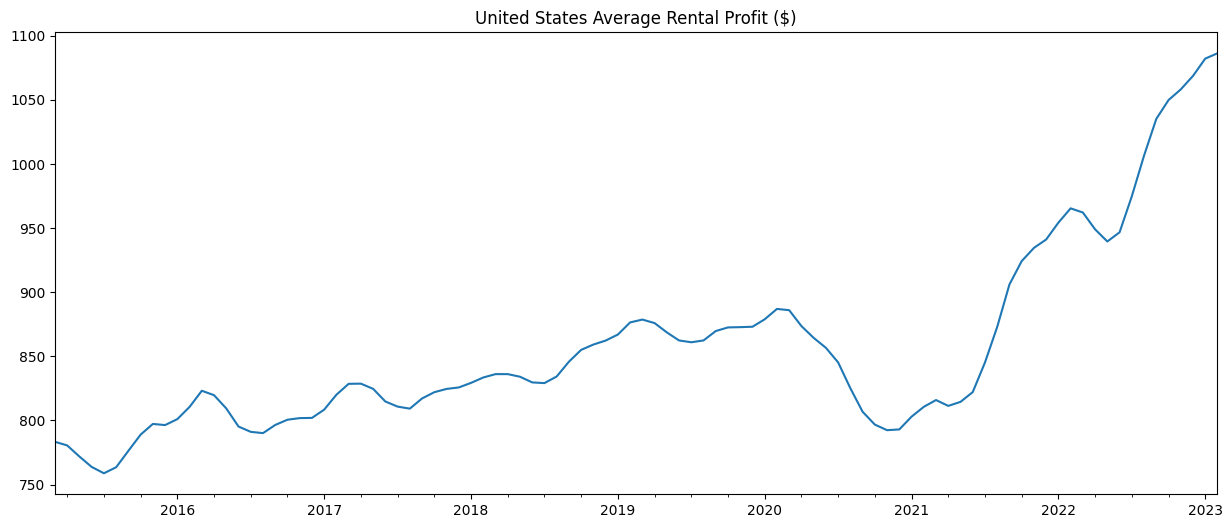

In [63]:
df_delta['United States'].plot(figsize=(15,6),title='United States Average Rental Profit ($)');

The figure above is plotting the average rental profit in dollars over the United States since 2015. We can see that rental profit has steadily increased from 2015 to 2020, however once the COVID-19 pandemic hit, rental profit dropped significantly which brought the profit back down to 2016 numbers. Then we see a sharp increase in profit from 2021 to today. Next we can dive deeper into the top 10 largest metropolitan regions to see what the profit looks like in specific regions.

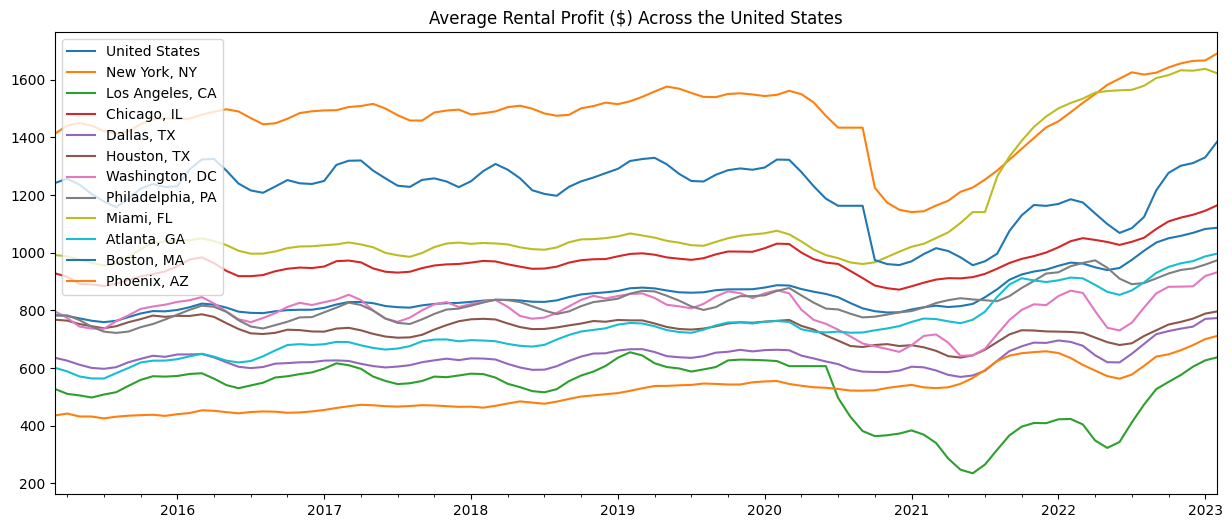

In [64]:
df_delta.plot(figsize=(15,6),title='Average Rental Profit ($) Across the United States');

The figure above is showing a time series graph for the top 10 metropolitan regions in the United States showing the average rental profit in dollars since 2015. While most of the geographical regions have a similar trend, we can see that New York, NY and Miami, FL are two of the top regions for rental profit. Los Angeles and Phoenix are at the bottom of this list by a significant amount. Real estate property values in New York are dramatically more expensive than in other regions of the country, so based on anecdotal knowledge that real estate in Florida is cheaper to purchase, the suggestion is for the investory to purchase properties in Miami, Florida in cash and then turn them into rental properties. The investor would be seeing a very stable rental market with profit at or greater than \\$1,000/month since 2015. Miami has experienced a boom since mid to late 2020 where rental profit has increased to above \\$1,500/month after paying the "mortgage".

# Conclusion

1. Investing in the real estate markets for 2bhk and 3 bhk of Miami, Atlanta, and Phoenix is highly promising and likely to result in higher profitability.

2. After analyzing the sales and inventory data for all homes values, we highly recommend considering Dallas, Texas as an excellent location for real estate investment.

3. The purchase of houses between the months of April and July would be a favorable decision for all homes values. 

4. There does not appear to be any relationship between the sale-to-list price ratio and the square footage home values. Therefore, we can answer the question that the square footage price (home value per number of bedrooms) is not directly impacting the sale and listing price ratio to go up or down. While the square footage home value for single family homes has been increasing, it does not appear to have been increasing as a result of the sale-to-list price ratio, nor does the sale-to-list price ratio appear to be impacted by the square footage home values. Since early 2022, the sale-to-list price ratio has been declining, and we can expect the ratio to display typical seasonal behaviors for this year where it rises through the summer before it begins to fall after the summer.

5. We would recommend to invest in Texas, since it has many cities with low days for pending in market.

6. While most of the geographical regions have a similar trend, we can see that New York, NY and Miami, FL are two of the top regions for rental profit. Los Angeles and Phoenix are at the bottom of this list by a significant amount. Real estate property values in New York are dramatically more expensive than in other regions of the country, so based on anecdotal knowledge that real estate in Florida is cheaper to purchase, the suggestion is for the investory to purchase properties in Miami, Florida in cash and then turn them into rental properties. The investor would be seeing a very stable rental market with profit at or greater than \\$1,000/month since 2015. Miami has experienced a boom since mid to late 2020 where rental profit has increased to above \\$1,500/month after paying the "mortgage".

